In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.dates import MonthLocator
import numpy as np

In [2]:
df_dim_date = pd.read_csv("dataset/dim_date.csv")
df_dim_districts = pd.read_csv("dataset/dim_districts.csv")
df_fact_stamps = pd.read_csv("dataset/fact_stamps.csv")
df_fact_transport = pd.read_csv("dataset/fact_transport.csv")
df_fact_TS_iPASS = pd.read_csv("dataset/fact_TS_iPASS.csv")


In [3]:
df_dim_date.head()

month  Mmm quarter  fiscal_year
0  2019-04-01  Apr      Q1         2019
1  2019-05-01  May      Q1         2019
2  2019-06-01  Jun      Q1         2019
3  2019-07-01  Jul      Q2         2019
4  2019-08-01  Aug      Q2         2019

In [4]:
df_dim_districts.head()

dist_code              district
0      19_1              Adilabad
1      22_2  Bhadradri Kothagudem
2      21_1           Hanumakonda
3      16_1             Hyderabad
4      20_2               Jagtial

In [5]:
df_fact_stamps.head()

dist_code       month  documents_registered_cnt  documents_registered_rev  \
0      14_1  2019-04-01                      4533                  59236363   
1      17_3  2019-04-01                      4151                  41508762   
2      20_3  2019-04-01                      2116                  23674170   
3      21_5  2019-04-01                      1089                  15915285   
4      23_1  2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0

In [6]:
df_fact_transport.head()

dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0      15_1  2019-04-01             17910              3011   
1      18_2  2019-04-01              3066               306   
2      20_3  2019-04-01              1577               215   
3      21_3  2019-04-01              1961               281   
4      21_7  2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
0                 1278                16110                 4182   
1                  128                 3156                  189   
2                  117                 1683                  104   
3                  113                 2082                  146   
4                   95                 1696                  145   

   seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
0                   717               19542                1477   
1                    33                3322                  56   
2                     5                1751                  41   
3                    16                2209                  35   
4                    20                1820                  41   

   category_Non-Transport  category_Transport  
0                   19856                1163  
1                    3203                 175  
2                    1648                 144  
3                    2075                 169  
4                    1701                 160

In [7]:
df_fact_TS_iPASS.head()

dist_code       month                              sector  investment in cr  \
0      14_1  01-04-2019                         Engineering            2.3200   
1      19_1  01-04-2019                         Engineering            0.6250   
2      20_3  01-04-2019                    Wood and Leather            0.2000   
3      20_3  01-04-2019                            Textiles            0.2675   
4      21_5  01-04-2019  Electrical and Electronic Products            0.1200   

   number_of_employees  
0                   15  
1                   13  
2                    8  
3                   27  
4                    5

In [8]:
merged_stamps_df = pd.merge(df_fact_stamps, df_dim_districts, on='dist_code', how='left')
merged_stamps_df.head()


dist_code       month  documents_registered_cnt  documents_registered_rev  \
0      14_1  2019-04-01                      4533                  59236363   
1      17_3  2019-04-01                      4151                  41508762   
2      20_3  2019-04-01                      2116                  23674170   
3      21_5  2019-04-01                      1089                  15915285   
4      23_1  2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev          district  
0                     0                     0      Mahabubnagar  
1                     0                     0          Siddipet  
2                     0                     0  Rajanna Sircilla  
3                     0                     0       Mahabubabad  
4                     0                     0          Nalgonda

In [9]:
#checking for null values
merged_stamps_df.isnull().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
district                    0
dtype: int64

## Question 1 (will use Power BI graph)

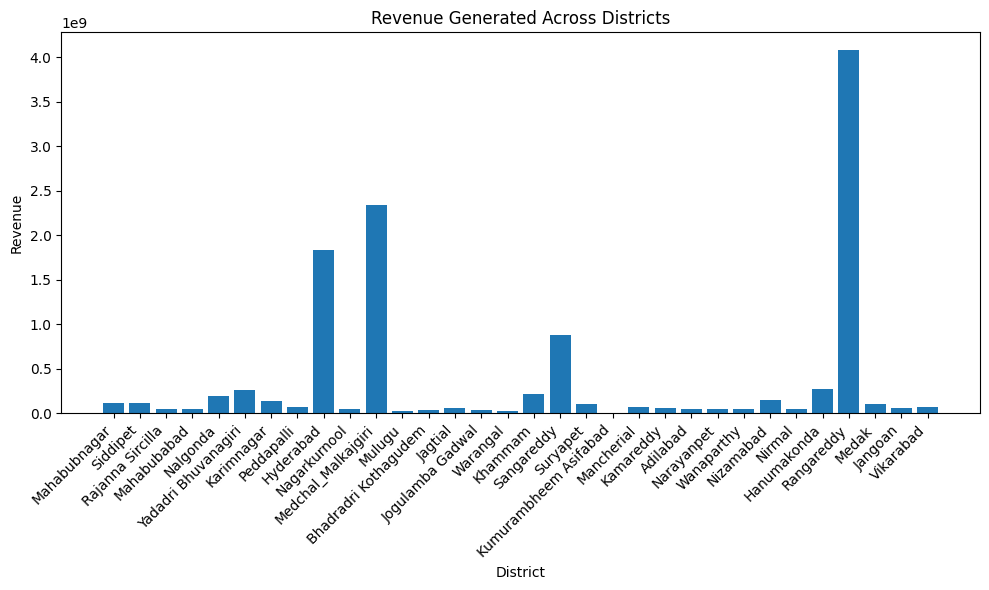

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(merged_stamps_df['district'], merged_stamps_df['documents_registered_rev'])
plt.xlabel('District')
plt.ylabel('Revenue')
plt.title('Revenue Generated Across Districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Question 2

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\2731949738.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_revenue = merged_stamps_df.groupby('district').sum()


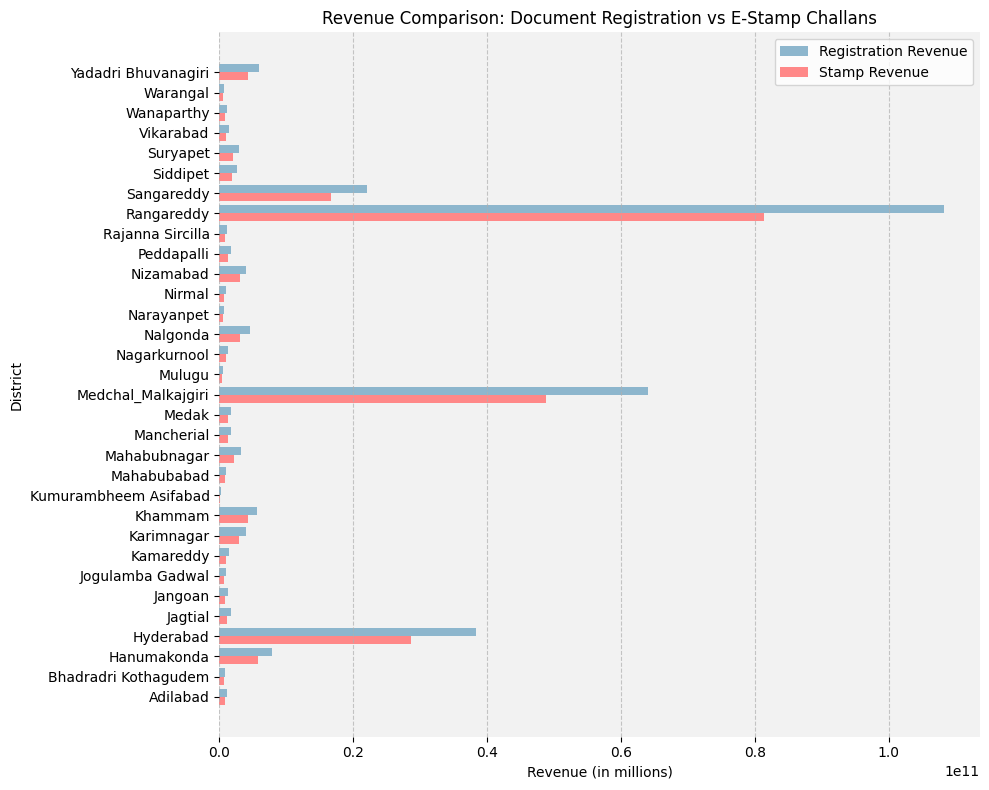

In [11]:
district_revenue = merged_stamps_df.groupby('district').sum()

bar_positions = np.arange(len(district_revenue))
bar_height = 0.4

# Define pastel colors
pastel_blue = '#8DB6CD'
pastel_red = '#FF8888'

fig, ax = plt.subplots(figsize=(10, 8))
registration_bars = ax.barh(bar_positions, district_revenue['documents_registered_rev'], bar_height, label='Registration Revenue', color=pastel_blue)
stamp_bars = ax.barh(bar_positions - bar_height, district_revenue['estamps_challans_rev'], bar_height, label='Stamp Revenue', color=pastel_red)

ax.set_title('Revenue Comparison: Document Registration vs E-Stamp Challans')
ax.set_xlabel('Revenue (in millions)')
ax.set_ylabel('District')
ax.set_yticks(bar_positions - bar_height/2)
ax.set_yticklabels(district_revenue.index, fontsize=10)
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

# Adding a background color to the plot
ax.set_facecolor('#f2f2f2')

# Adding a border around the plot
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()



In [12]:
merged_stamps_df = pd.merge(merged_stamps_df, df_dim_date, on='month', how='left')
merged_stamps_df

dist_code       month  documents_registered_cnt  \
0         14_1  2019-04-01                      4533   
1         17_3  2019-04-01                      4151   
2         20_3  2019-04-01                      2116   
3         21_5  2019-04-01                      1089   
4         23_1  2019-04-01                      6133   
...        ...         ...                       ...   
1499      20_4  2023-03-01                      1510   
1500      14_5  2023-03-01                       980   
1501      21_1  2023-03-01                      4321   
1502      22_2  2023-03-01                      1255   
1503      23_1  2023-03-01                      5806   

      documents_registered_rev  estamps_challans_cnt  estamps_challans_rev  \
0                     59236363                     0                     0   
1                     41508762                     0                     0   
2                     23674170                     0                     0   
3                     15915285                     0                     0   
4                     82593256                     0                     0   
...                        ...                   ...                   ...   
1499                  54036552                  1596              57171081   
1500                  23898383                  1026              23106330   
1501                 279791569                  4642             284765300   
1502                  18695648                  1566              22453502   
1503                 132022152                  5997             135318190   

                  district  Mmm quarter  fiscal_year  
0             Mahabubnagar  Apr      Q1         2019  
1                 Siddipet  Apr      Q1         2019  
2         Rajanna Sircilla  Apr      Q1         2019  
3              Mahabubabad  Apr      Q1         2019  
4                 Nalgonda  Apr      Q1         2019  
...                    ...  ...     ...          ...  
1499            Peddapalli  Mar      Q4         2022  
1500            Narayanpet  Mar      Q4         2022  
1501           Hanumakonda  Mar      Q4         2022  
1502  Bhadradri Kothagudem  Mar      Q4         2022  
1503              Nalgonda  Mar      Q4         2022  

[1504 rows x 10 columns]

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\2433743050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fy_2022_stamps_df['contribution_ratio'] = fy_2022_stamps_df['estamps_challans_rev'] / fy_2022_stamps_df['documents_registered_rev']


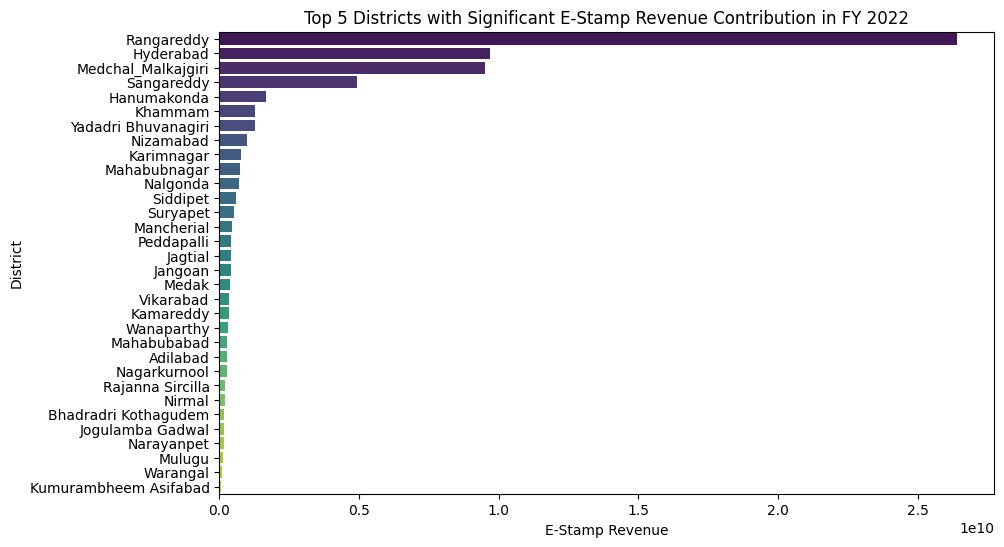

In [13]:
fy_2022_stamps_df = merged_stamps_df[merged_stamps_df['fiscal_year'] == 2022]
fy_2022_stamps_df['contribution_ratio'] = fy_2022_stamps_df['estamps_challans_rev'] / fy_2022_stamps_df['documents_registered_rev']
threshold = 1 # Adjust this threshold as needed
significant_districts = fy_2022_stamps_df[fy_2022_stamps_df['contribution_ratio'] > threshold]

grouped_districts = significant_districts.groupby('district').agg({
    'estamps_challans_rev': 'sum',
    'documents_registered_rev': 'sum'
}).reset_index()
top_districts = grouped_districts.sort_values('estamps_challans_rev', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='estamps_challans_rev', y='district', data=top_districts, palette='viridis')
plt.xlabel('E-Stamp Revenue')
plt.ylabel('District')
plt.title('Top 5 Districts with Significant E-Stamp Revenue Contribution in FY 2022')
plt.show()


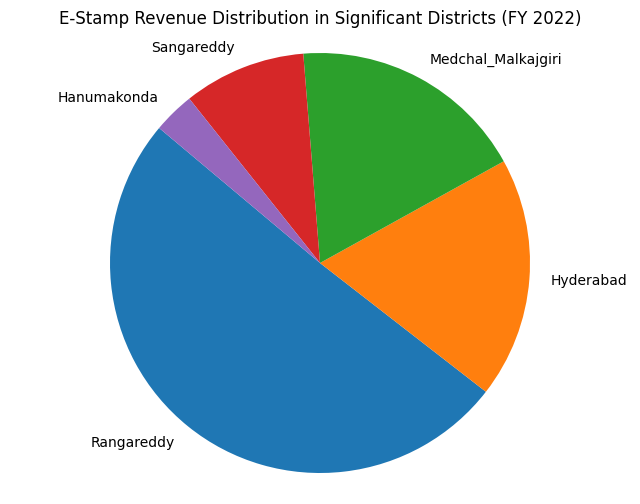

In [14]:
top_districts = grouped_districts.sort_values('estamps_challans_rev', ascending=False).head()

labels = top_districts['district']
sizes = top_districts['estamps_challans_rev']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels,startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('E-Stamp Revenue Distribution in Significant Districts (FY 2022)')
plt.show()

## Question 3

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\3018591028.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_revenue = merged_stamps_df.groupby('month').sum().reset_index()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\3018591028.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


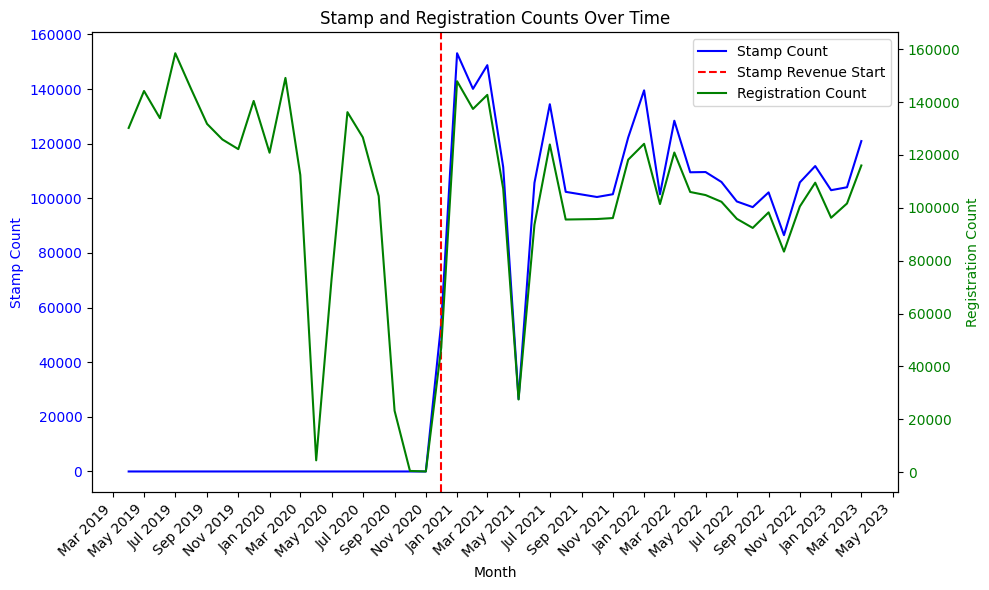

In [15]:
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed
merged_stamps_df['month'] = pd.to_datetime(merged_stamps_df['month'], format='%Y-%m')
month_revenue = merged_stamps_df.groupby('month').sum().reset_index()

# Plot stamp count over time
ax1.plot(month_revenue['month'], month_revenue['estamps_challans_cnt'], color='blue', label='Stamp Count')
ax1.set_xlabel('Month')
ax1.set_ylabel('Stamp Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for registration count
ax2 = ax1.twinx()
ax2.plot(month_revenue['month'], month_revenue['documents_registered_cnt'], color='green', label='Registration Count')
ax2.set_ylabel('Registration Count', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Mark the implementation of stamp revenue with a vertical line
stamp_revenue_start = pd.to_datetime('2020-12-01')
ax1.axvline(stamp_revenue_start, color='red', linestyle='--', label='Stamp Revenue Start')

# Set xticks for each month
locator = MonthLocator(bymonthday=1, interval=2)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


plt.title('Stamp and Registration Counts Over Time')
plt.tight_layout()
plt.show()

## Question 4

In [16]:
revenue_by_district = merged_stamps_df.groupby('district')['estamps_challans_rev'].sum()

# Define quantiles to categorize districts into segments
quantiles = revenue_by_district.quantile([0, 0.33, 0.66, 1])

# Function to assign segment labels
def assign_segment(revenue):
    if revenue <= quantiles[0.33]:
        return 'Low Revenue'
    elif revenue <= quantiles[0.66]:
        return 'Medium Revenue'
    else:
        return 'High Revenue'

# Assign segment labels to each district
merged_stamps_df['revenue_segment'] = merged_stamps_df['district'].map(revenue_by_district.apply(assign_segment))

# Print the DataFrame with assigned segments
merged_stamps_df.head()


dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      17_3 2019-04-01                      4151                  41508762   
2      20_3 2019-04-01                      2116                  23674170   
3      21_5 2019-04-01                      1089                  15915285   
4      23_1 2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev          district  Mmm quarter  \
0                     0                     0      Mahabubnagar  Apr      Q1   
1                     0                     0          Siddipet  Apr      Q1   
2                     0                     0  Rajanna Sircilla  Apr      Q1   
3                     0                     0       Mahabubabad  Apr      Q1   
4                     0                     0          Nalgonda  Apr      Q1   

   fiscal_year revenue_segment  
0         2019    High Revenue  
1         2019  Medium Revenue  
2         2019     Low Revenue  
3         2019     Low Revenue  
4         2019    High Revenue

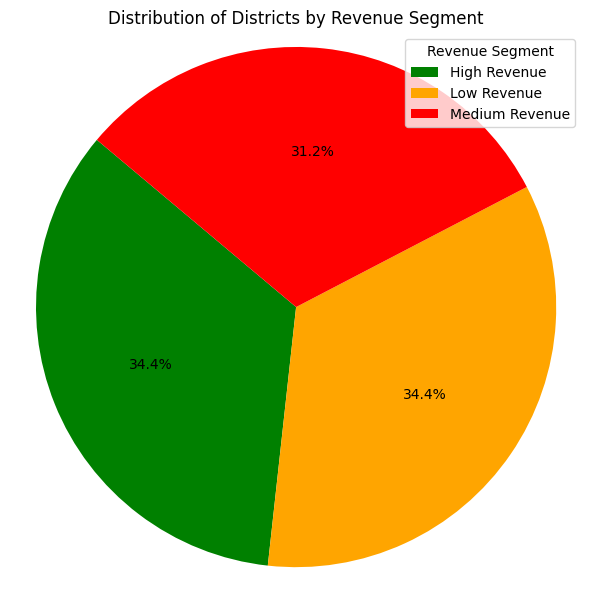

In [17]:

segment_counts = merged_stamps_df['revenue_segment'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
colors = ['green', 'orange', 'red']
plt.pie(segment_counts, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Districts by Revenue Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title="Revenue Segment", labels=segment_counts.index, loc="upper right")
 
plt.tight_layout(pad=1.0)
plt.show()


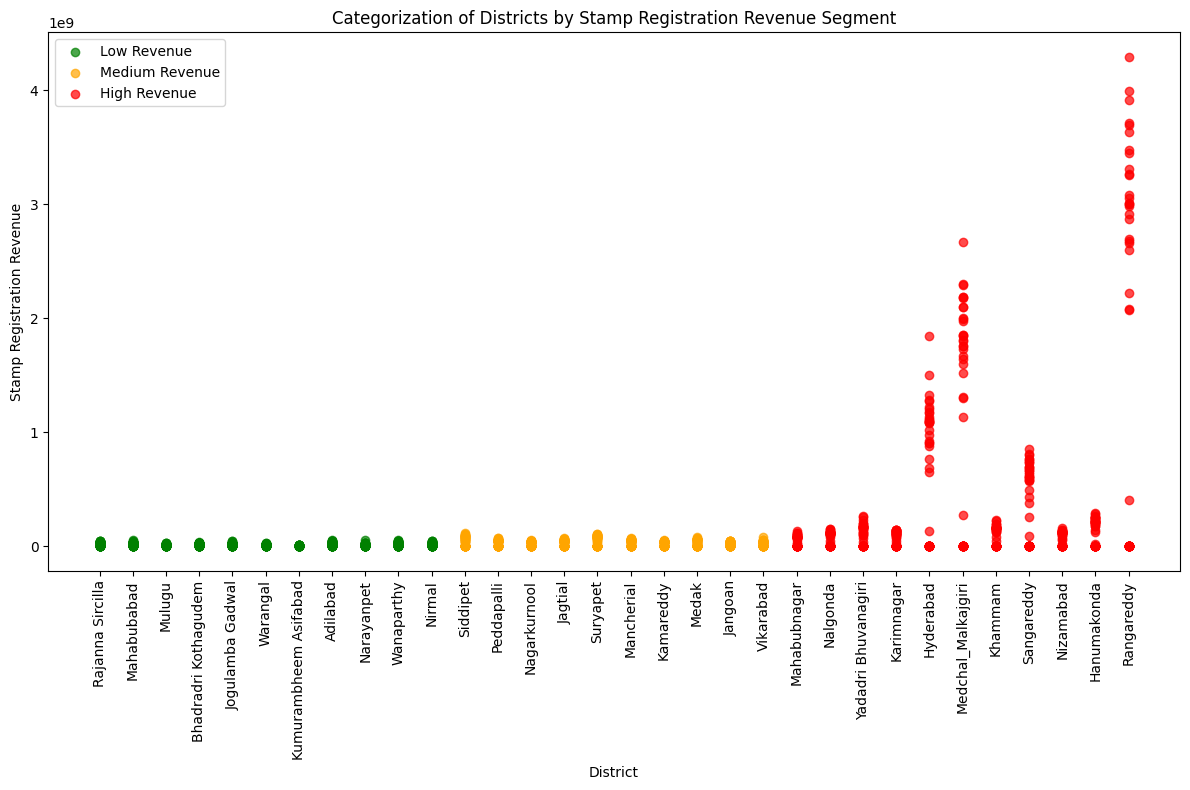

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'merged_stamps_df' with columns 'district', 'revenue_segment', and 'estamps_challans_rev'

# Set up a color palette for the segments
segment_colors = {'Low Revenue': 'green', 'Medium Revenue': 'orange', 'High Revenue': 'red'}

# Create a scatter plot with color-coded segments
plt.figure(figsize=(12, 8))

# Iterate through each segment and plot points with the corresponding color
for segment, color in segment_colors.items():
    segment_df = merged_stamps_df[merged_stamps_df['revenue_segment'] == segment]
    plt.scatter(segment_df['district'], segment_df['estamps_challans_rev'], color=color, label=segment, alpha=0.7)

plt.title('Categorization of Districts by Stamp Registration Revenue Segment')
plt.xlabel('District')
plt.ylabel('Stamp Registration Revenue')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


In [19]:
import geopandas as gpd
import folium

# Load GeoJSON data using GeoPandas
json_file_path = 'telangana_district_map.json'
gdf = gpd.read_file(json_file_path)

# Set the CRS for the GeoDataFrame (replace 'EPSG:4326' with the correct CRS code)
gdf.crs = 'EPSG:4326'  # For example, using WGS84

# Reproject the GeoDataFrame if needed (replace 'EPSG:3857' with your desired CRS)
# gdf = gdf.to_crs('EPSG:3857')

# Create a Folium map centered around the data
center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Add GeoJSON data to the map
folium.GeoJson(gdf).add_to(m)

# Save the map as an HTML file
output_map_path = 'output_map.html'
m.save(output_map_path)

# Display the map (if using a Jupyter Notebook)
display(m)



C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\1797910697.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = gdf.geometry.centroid.y.mean()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\1797910697.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = gdf.geometry.centroid.x.mean()


In [20]:
import folium
import geopandas as gpd

json_file_path = 'telangana_district_map.json'
gdf = gpd.read_file(json_file_path)

gdf.crs = 'EPSG:4326'

district_segment_mapping = dict(zip(merged_stamps_df['district'], merged_stamps_df['revenue_segment']))

def style_function(feature):
    segment = district_segment_mapping.get(feature['properties']['New_Distri'])
    return {
        'fillOpacity': 0.6,
        'fillColor': 'green' if segment == 'Low Revenue' else 'orange' if segment == 'Medium Revenue' else 'red',
        'color': 'black',
        'weight': 1.5,
        'dashArray': '5, 5',
    }

center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10, tiles=None)

tooltip = folium.GeoJsonTooltip(fields=['New_Distri'])

folium.GeoJson(gdf, style_function=style_function, tooltip=tooltip).add_to(m)

for index, row in gdf.iterrows():
    district_name = row['New_Distri']
    district_center = [row.geometry.centroid.y, row.geometry.centroid.x]
    
    # Create a custom icon to display district name as text
    icon = folium.DivIcon(html=f'<div style="font-size: 15px;">{district_name}</div>')
    folium.Marker(location=district_center, icon=icon).add_to(m)

legend_html = '''
    <style>
        .map-legend {
            position: absolute;
            bottom: 20px;
            left: 50px;
            width: 220px;
            padding: 6px;
            background-color: rgba(255, 255, 255, 0.8);
            border-radius: 4px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
        }
    </style>
    <div class="map-legend">
        <p>Legend:</p>
        <p><span class="low-revenue">Low Revenue</span></p>
        <p><span class="medium-revenue">Medium Revenue</span></p>
        <p><span class="high-revenue">High Revenue</span></p>
    </div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

colormap_html = '''
    <div style="position: absolute; bottom: 40px; left: 50px; width: 220px; padding: 6px; background-color: rgba(255, 255, 255, 0.8); border-radius: 4px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);">
        <p>Map Labels:</p>
        <p><span style="color: black;">District Labels</span></p>
    </div>
'''
m.get_root().html.add_child(folium.Element(colormap_html))

output_map_path = 'temp_map.html'
m.save(output_map_path)

display(m)


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\1311725497.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = gdf.geometry.centroid.y.mean()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\1311725497.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = gdf.geometry.centroid.x.mean()


## Question 6

In [21]:
merged_transport_df = pd.merge(df_fact_transport, df_dim_districts, on='dist_code', how='left')
merged_transport_df.head()


dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0      15_1  2019-04-01             17910              3011   
1      18_2  2019-04-01              3066               306   
2      20_3  2019-04-01              1577               215   
3      21_3  2019-04-01              1961               281   
4      21_7  2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
0                 1278                16110                 4182   
1                  128                 3156                  189   
2                  117                 1683                  104   
3                  113                 2082                  146   
4                   95                 1696                  145   

   seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
0                   717               19542                1477   
1                    33                3322                  56   
2                     5                1751                  41   
3                    16                2209                  35   
4                    20                1820                  41   

   category_Non-Transport  category_Transport                 district  
0                   19856                1163               Rangareddy  
1                    3203                 175                Kamareddy  
2                    1648                 144         Rajanna Sircilla  
3                    2075                 169                  Jangoan  
4                    1701                 160  Jayashankar Bhupalpally

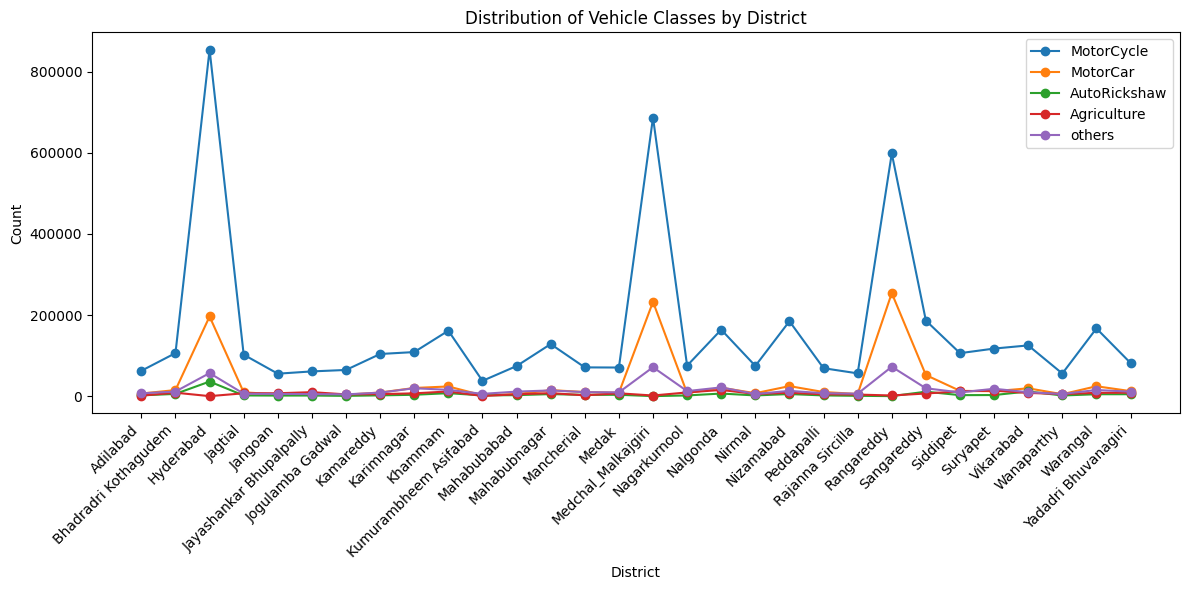

In [22]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
vehicle_classes = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others']

total_class_df = merged_transport_df.groupby('district')[vehicle_classes].sum()

# Create a figure for line plots
plt.figure(figsize=(12, 6))
plt.title('Distribution of Vehicle Classes by District')

# Plot a line for each vehicle class with different colors
for vehicle_class, color in zip(total_class_df.columns, colors):
    plt.plot(total_class_df.index, total_class_df[vehicle_class], marker='o', color=color, label=vehicle_class[13:])

plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the line plot
plt.show()

In [23]:
merged_transport_df['TotalVehicles'] = merged_transport_df[['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture', 'vehicleClass_others']].sum(axis=1)
# for vehicle_class in vehicle_classes:
#     merged_transport_df[vehicle_class] = merged_transport_df[vehicle_class] / merged_transport_df['TotalVehicles']
merged_transport_df.head()

dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0      15_1  2019-04-01             17910              3011   
1      18_2  2019-04-01              3066               306   
2      20_3  2019-04-01              1577               215   
3      21_3  2019-04-01              1961               281   
4      21_7  2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
0                 1278                16110                 4182   
1                  128                 3156                  189   
2                  117                 1683                  104   
3                  113                 2082                  146   
4                   95                 1696                  145   

   seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
0                   717               19542                1477   
1                    33                3322                  56   
2                     5                1751                  41   
3                    16                2209                  35   
4                    20                1820                  41   

   category_Non-Transport  category_Transport                 district  \
0                   19856                1163               Rangareddy   
1                    3203                 175                Kamareddy   
2                    1648                 144         Rajanna Sircilla   
3                    2075                 169                  Jangoan   
4                    1701                 160  Jayashankar Bhupalpally   

   TotalVehicles  
0          21019  
1           3378  
2           1792  
3           2244  
4           1861

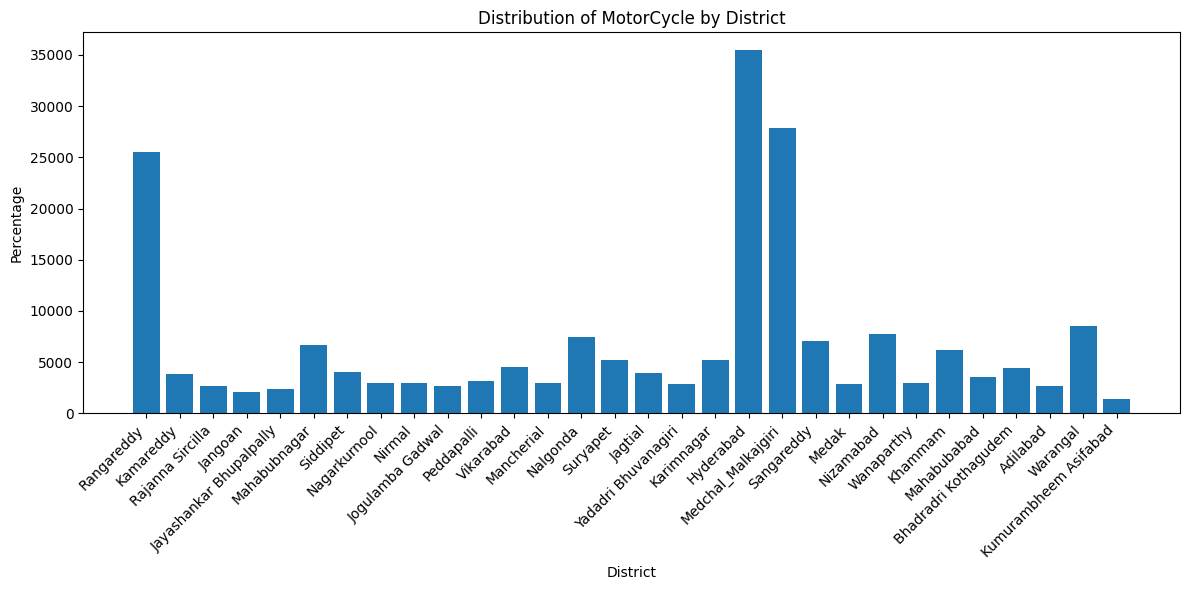

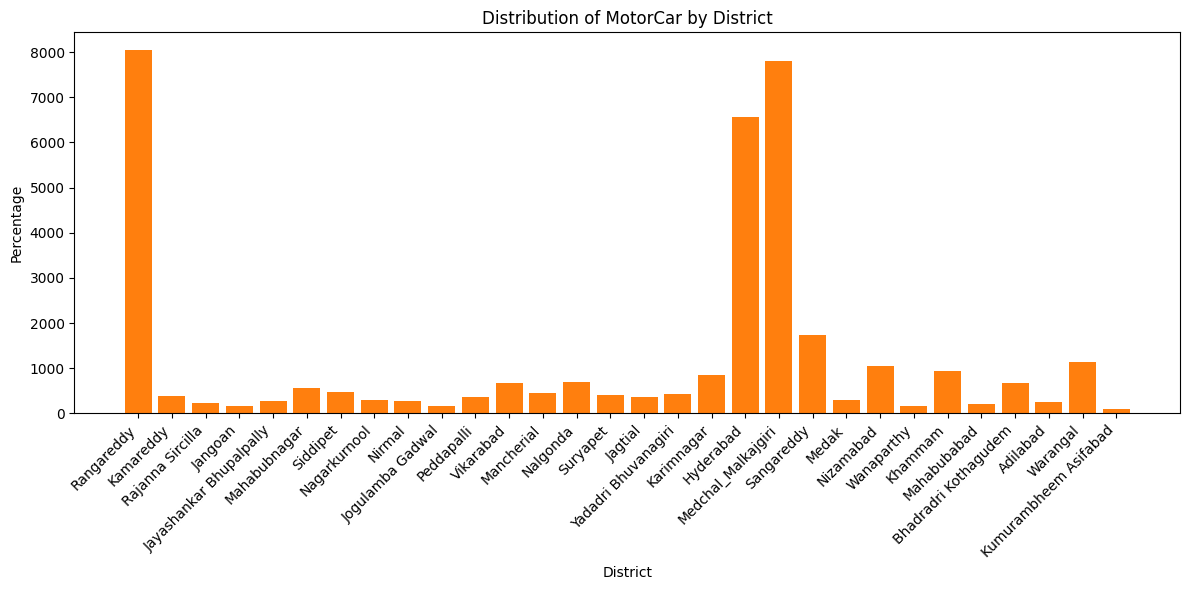

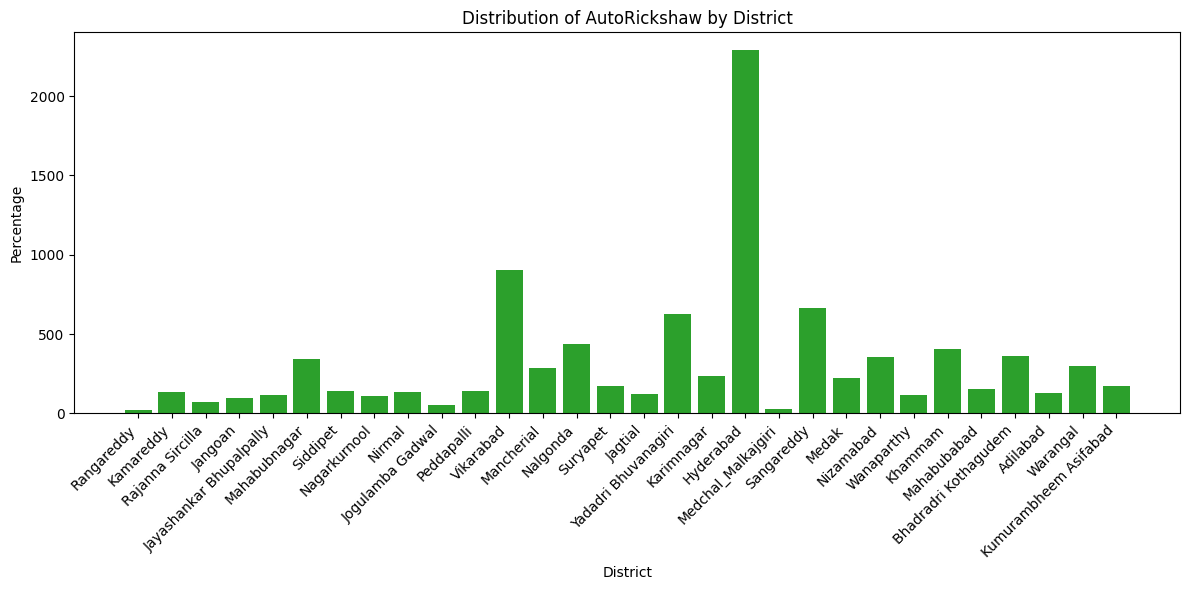

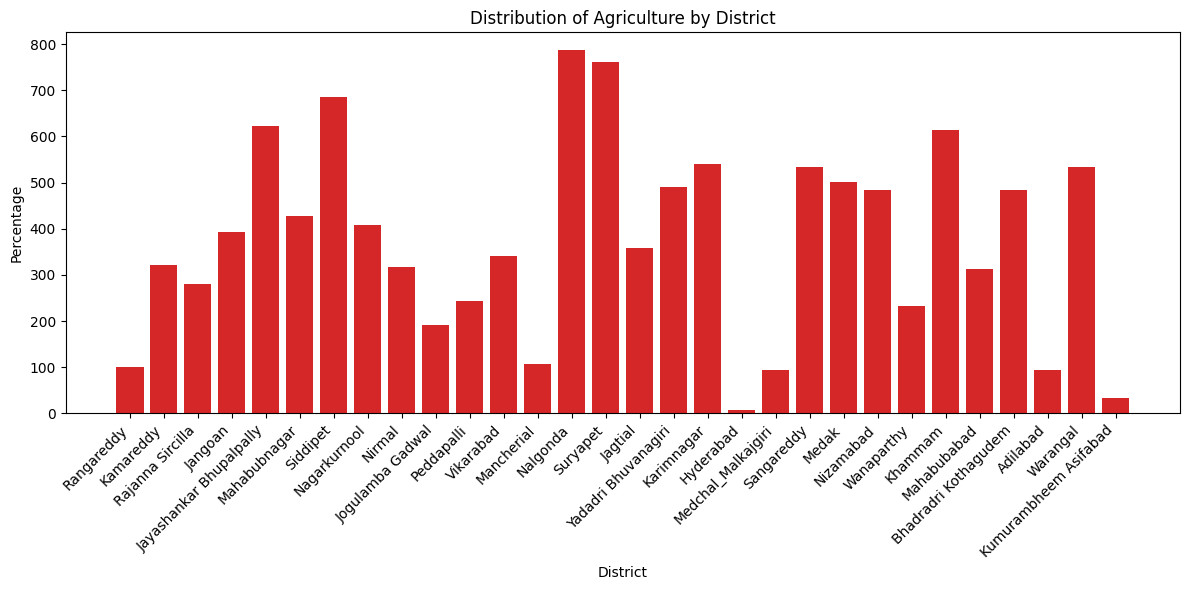

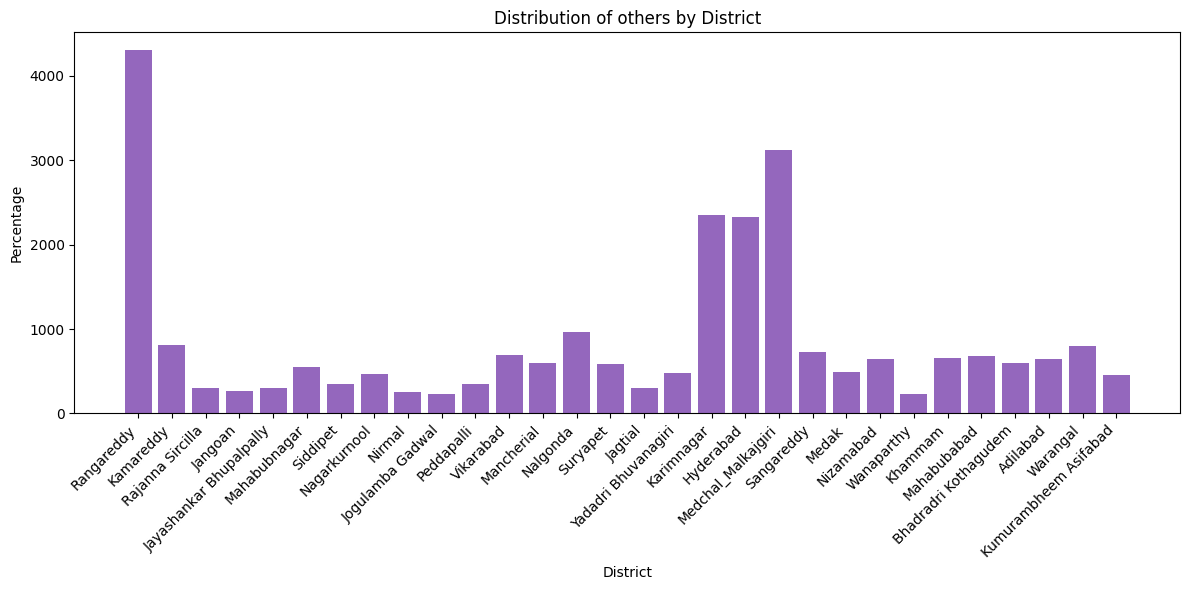

In [24]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot individual plots for each vehicle class with different colors
for vehicle_class, color in zip(vehicle_classes, colors):
    plt.figure(figsize=(12, 6))
    plt.bar(merged_transport_df['district'], merged_transport_df[vehicle_class], color=color)
    plt.xlabel('District')
    plt.ylabel('Percentage')
    plt.title(f'Distribution of {vehicle_class[13:]} by District')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\2042109164.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = merged_transport_df.groupby('district').sum()


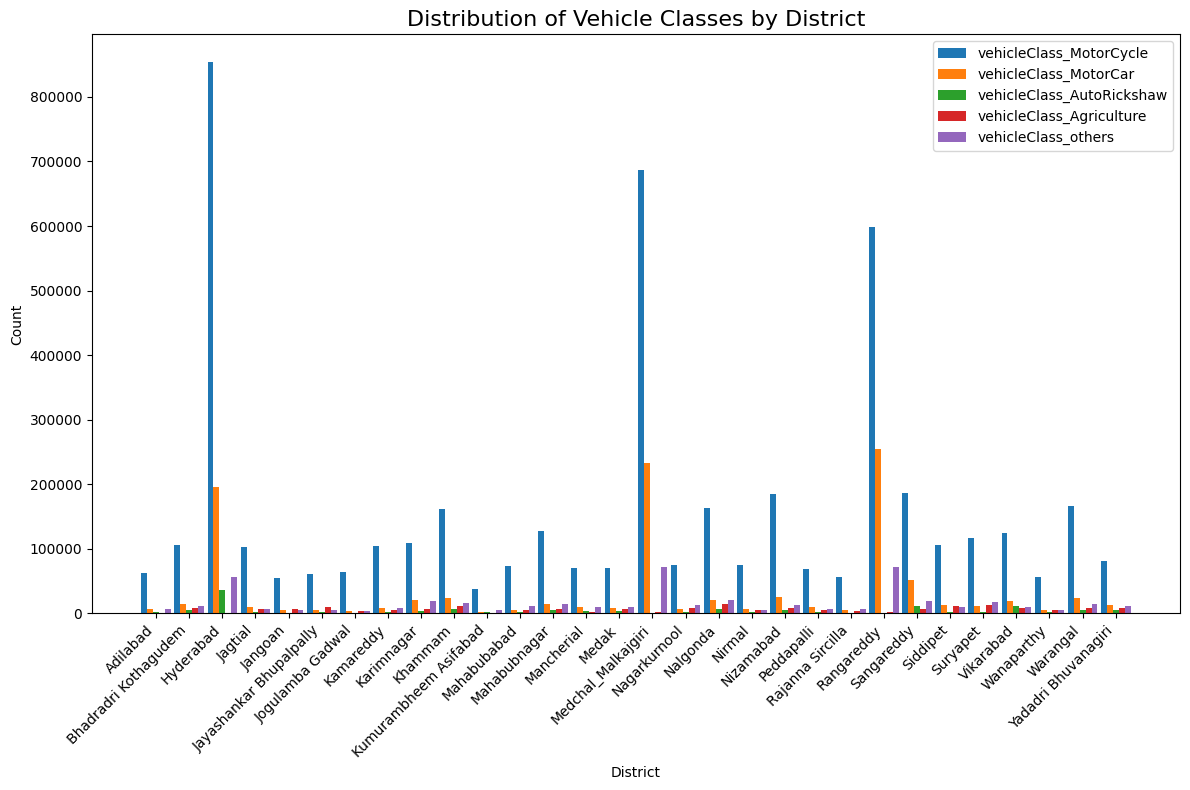

In [25]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
grouped_data = merged_transport_df.groupby('district').sum()

# Create a figure with subplots
# Create positions for bars
bar_width = 0.18
positions = np.arange(len(grouped_data.index))

# Create a figure
plt.figure(figsize=(12, 8))
plt.title('Distribution of Vehicle Classes by District', fontsize=16)

# Plot bars for each vehicle class
for idx, (vehicle_class, color) in enumerate(zip(vehicle_classes, colors)):
    plt.bar(positions + (idx * bar_width), grouped_data[vehicle_class], bar_width, color=color, label=vehicle_class)

# Set labels, ticks, and legend
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(positions + bar_width * 2, grouped_data.index, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Question 8 (Done with power bi)

In [32]:
df_fact_TS_iPASS['month'] = pd.to_datetime(df_fact_TS_iPASS['month'], format='%d-%m-%Y')
df_dim_date['month'] = pd.to_datetime(df_dim_date['month'], format='%Y-%m-%d')

merged_tsipass_df = pd.merge(df_fact_TS_iPASS, df_dim_date, on='month', how='left')
merged_tsipass_df = pd.merge(merged_tsipass_df, df_dim_districts, on='dist_code', how='left')

merged_tsipass_df.head()

dist_code      month                              sector  investment in cr  \
0      14_1 2019-04-01                         Engineering            2.3200   
1      19_1 2019-04-01                         Engineering            0.6250   
2      20_3 2019-04-01                    Wood and Leather            0.2000   
3      20_3 2019-04-01                            Textiles            0.2675   
4      21_5 2019-04-01  Electrical and Electronic Products            0.1200   

   number_of_employees  Mmm quarter  fiscal_year          district  
0                   15  Apr      Q1         2019      Mahabubnagar  
1                   13  Apr      Q1         2019          Adilabad  
2                    8  Apr      Q1         2019  Rajanna Sircilla  
3                   27  Apr      Q1         2019  Rajanna Sircilla  
4                    5  Apr      Q1         2019       Mahabubabad

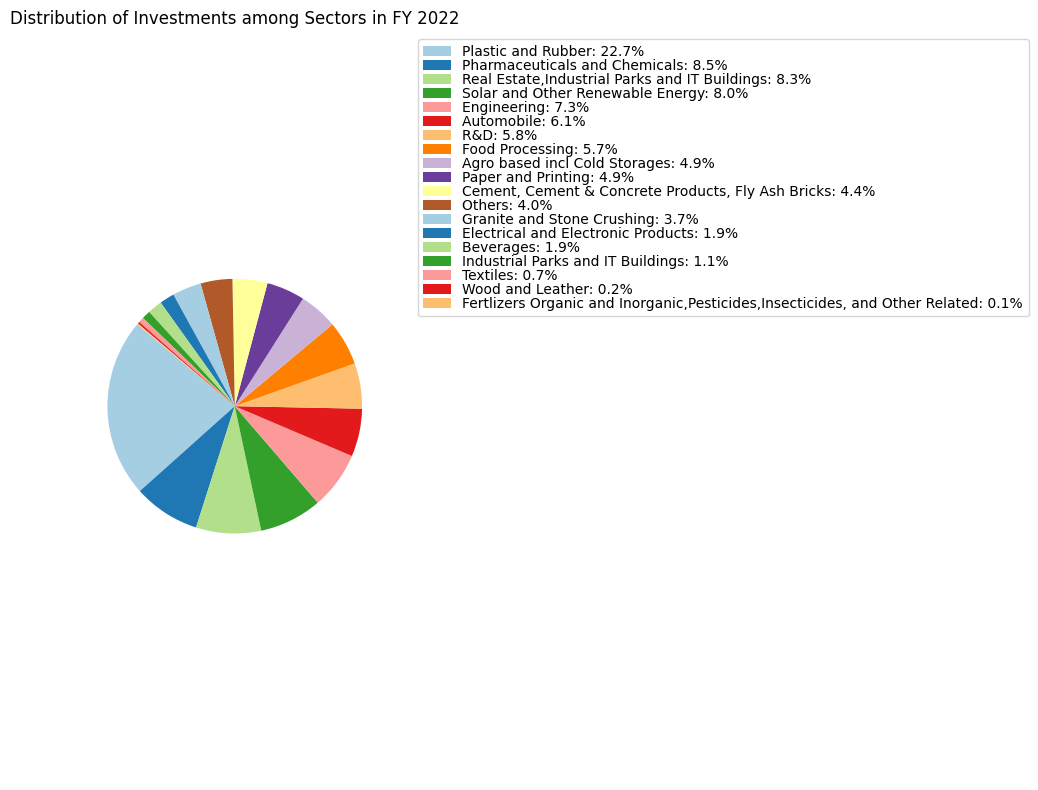

In [29]:
# Filtering for FY 2022
filtered_data = merged_tsipass_df[merged_tsipass_df['fiscal_year'] == 2022]

# Grouping data by sector and calculating total investments
sector_investments = filtered_data.groupby('sector')['investment in cr'].sum()

# Sorting sectors by total investments in descending order
sorted_sectors = sector_investments.sort_values(ascending=False)

# Selecting the top 5 sectors
top_5_sectors = sorted_sectors.head(5)

# Plotting the data
plt.figure(figsize=(10, 8))
# Adjust figsize to make the pie slightly smaller
wedges, texts = plt.pie(sorted_sectors,startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Investments among Sectors in FY 2022')
plt.axis('equal')

# Create a custom legend with sector names and percentages
legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(sorted_sectors.index, sorted_sectors / sorted_sectors.sum() * 100)]
legend = plt.legend(wedges, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), labelspacing=0.)
plt.setp(legend.get_title(), fontsize='10')

plt.tight_layout()
plt.show()

## Question 9

In [33]:
merged_tsipass_df.columns

Index(['dist_code', 'month', 'sector', 'investment in cr',
       'number_of_employees', 'Mmm', 'quarter', 'fiscal_year', 'district'],
      dtype='object')

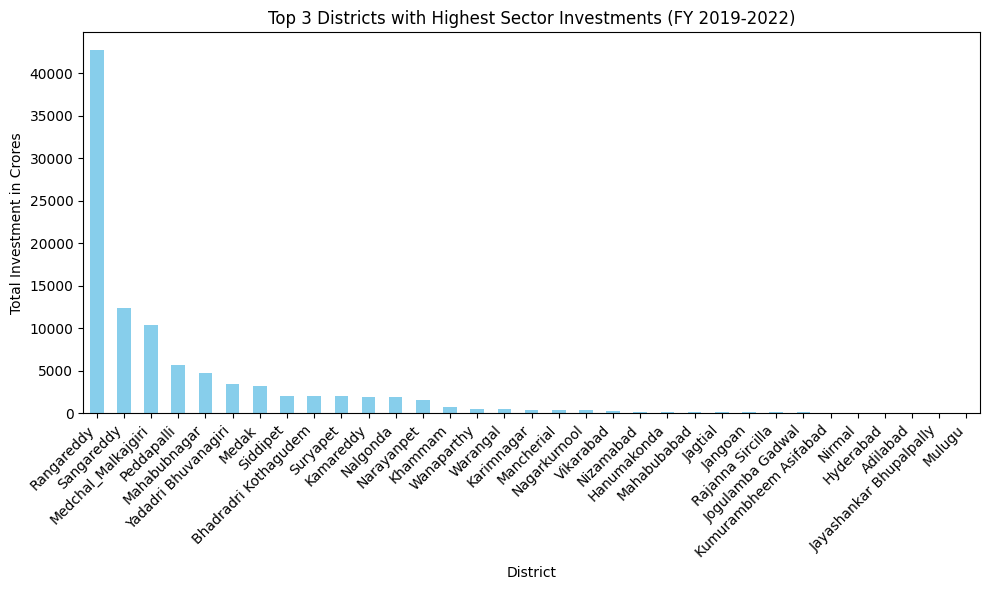

In [34]:
# Filtering for FY 2019 to 2022
filtered_data = merged_tsipass_df[(merged_tsipass_df['fiscal_year'] >= 2019) & (merged_tsipass_df['fiscal_year'] <= 2022)]

# Grouping data by district and calculating total sector investments
district_investments = filtered_data.groupby('district')['investment in cr'].sum()

# Sorting districts by total investments in descending order
sorted_districts = district_investments.sort_values(ascending=False)

# Selecting the top 3 districts
#top_3_districts = sorted_districts.head(3)

# Plotting the data
plt.figure(figsize=(10, 6))
sorted_districts.plot(kind='bar', color='skyblue')
plt.title('Top 3 Districts with Highest Sector Investments (FY 2019-2022)')
plt.xlabel('District')
plt.ylabel('Total Investment in Crores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


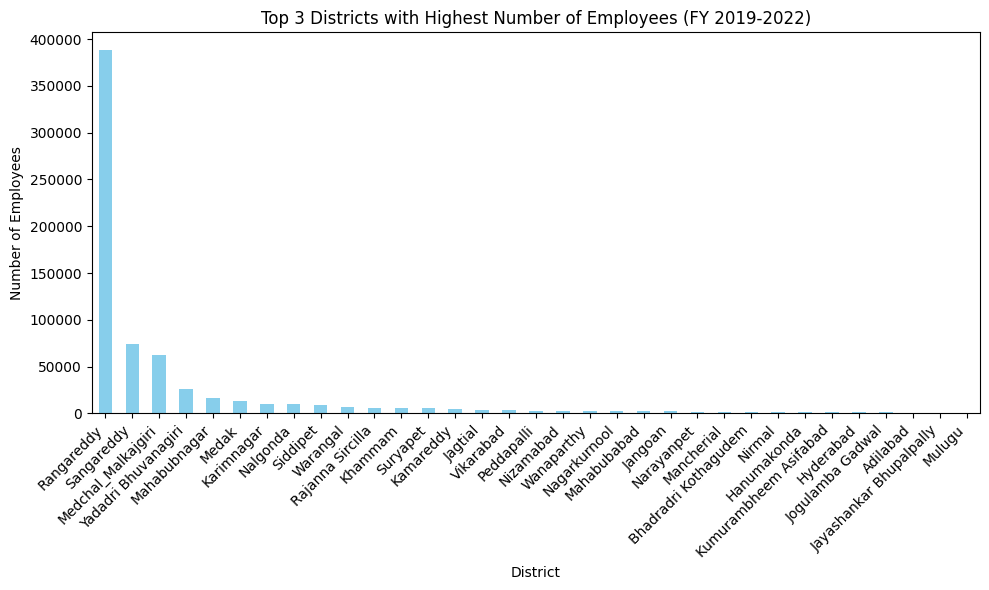

In [35]:
# Filtering for FY 2019 to 2022
filtered_data = merged_tsipass_df[(merged_tsipass_df['fiscal_year'] >= 2019) & (merged_tsipass_df['fiscal_year'] <= 2022)]

# Grouping data by district and calculating total sector investments
district_investments = filtered_data.groupby('district')['number_of_employees'].sum()

# Sorting districts by total investments in descending order
sorted_districts = district_investments.sort_values(ascending=False)

# Selecting the top 3 districts
#top_3_districts = sorted_districts.head(3)

# Plotting the data
plt.figure(figsize=(10, 6))
sorted_districts.plot(kind='bar', color='skyblue')
plt.title('Top 3 Districts with Highest Number of Employees (FY 2019-2022)')
plt.xlabel('District')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [36]:
significant_dist = ['Hyderabad', 'Rangareddy','Sangareddy','Medchal_Malkajgiri','Yadadri Bhuvanagiri']
val = pd.DataFrame()
new = []
val['district'] = significant_dist
for i in significant_dist:
    new.append(merged_tsipass_df[merged_tsipass_df['district']==i]['investment in cr'].sum())
val['investment'] = new
val

district  investment
0            Hyderabad     55.7956
1           Rangareddy  42706.3320
2           Sangareddy  12366.7556
3   Medchal_Malkajgiri  10394.5610
4  Yadadri Bhuvanagiri   3499.8803

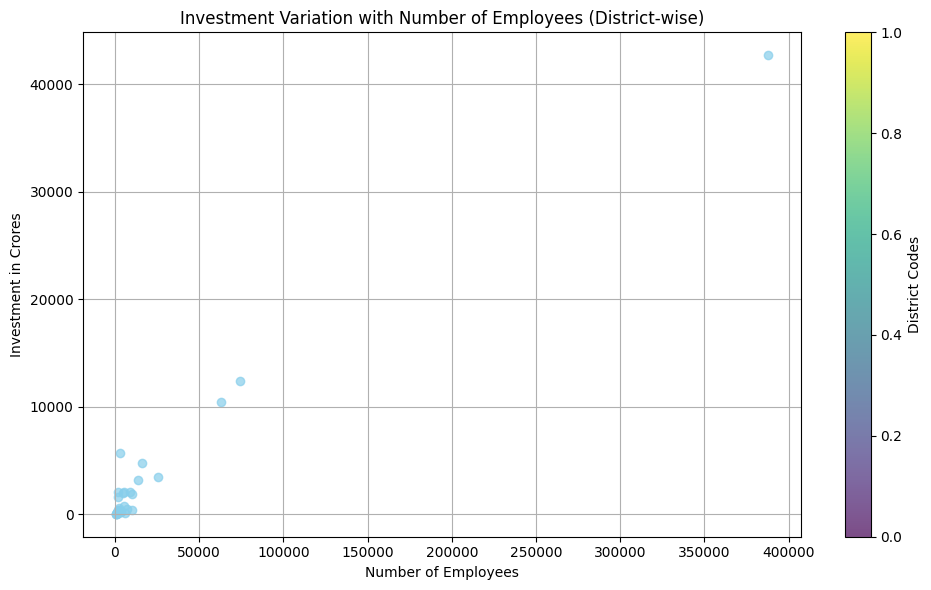

In [37]:
plt.figure(figsize=(10, 6))
aggregated_data = merged_tsipass_df.groupby('district')[['investment in cr', 'number_of_employees']].sum()

plt.scatter(aggregated_data['number_of_employees'], aggregated_data['investment in cr'], color='skyblue', alpha=0.7)
plt.title('Investment Variation with Number of Employees (District-wise)')
plt.xlabel('Number of Employees')
plt.ylabel('Investment in Crores')
plt.colorbar(label='District Codes')
plt.grid(True)
plt.tight_layout()
plt.show()

## Question 10

In [38]:
merged_stamps_df.head()

dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      17_3 2019-04-01                      4151                  41508762   
2      20_3 2019-04-01                      2116                  23674170   
3      21_5 2019-04-01                      1089                  15915285   
4      23_1 2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev          district  Mmm quarter  \
0                     0                     0      Mahabubnagar  Apr      Q1   
1                     0                     0          Siddipet  Apr      Q1   
2                     0                     0  Rajanna Sircilla  Apr      Q1   
3                     0                     0       Mahabubabad  Apr      Q1   
4                     0                     0          Nalgonda  Apr      Q1   

   fiscal_year revenue_segment  
0         2019    High Revenue  
1         2019  Medium Revenue  
2         2019     Low Revenue  
3         2019     Low Revenue  
4         2019    High Revenue

In [39]:
merged_tsipass_df.head()

dist_code      month                              sector  investment in cr  \
0      14_1 2019-04-01                         Engineering            2.3200   
1      19_1 2019-04-01                         Engineering            0.6250   
2      20_3 2019-04-01                    Wood and Leather            0.2000   
3      20_3 2019-04-01                            Textiles            0.2675   
4      21_5 2019-04-01  Electrical and Electronic Products            0.1200   

   number_of_employees  Mmm quarter  fiscal_year          district  
0                   15  Apr      Q1         2019      Mahabubnagar  
1                   13  Apr      Q1         2019          Adilabad  
2                    8  Apr      Q1         2019  Rajanna Sircilla  
3                   27  Apr      Q1         2019  Rajanna Sircilla  
4                    5  Apr      Q1         2019       Mahabubabad

In [41]:
# Merge datasets based on common columns (month and district name)
merged_transport_df['month'] = pd.to_datetime(merged_transport_df['month'], format='%Y-%m')

all_merged_df = pd.merge(merged_stamps_df, merged_transport_df, on=['month', 'district','dist_code'])
all_merged_df = pd.merge(all_merged_df, merged_tsipass_df, on=['month', 'district','fiscal_year','quarter','Mmm','dist_code'])

In [43]:
all_merged_df.head()

dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      14_1 2019-04-01                      4533                  59236363   
2      17_3 2019-04-01                      4151                  41508762   
3      20_3 2019-04-01                      2116                  23674170   
4      20_3 2019-04-01                      2116                  23674170   

   estamps_challans_cnt  estamps_challans_rev          district  Mmm quarter  \
0                     0                     0      Mahabubnagar  Apr      Q1   
1                     0                     0      Mahabubnagar  Apr      Q1   
2                     0                     0          Siddipet  Apr      Q1   
3                     0                     0  Rajanna Sircilla  Apr      Q1   
4                     0                     0  Rajanna Sircilla  Apr      Q1   

   fiscal_year  ... seatCapacity_4_to_6  seatCapacity_above_6  \
0         2019  ...                 450                    44   
1         2019  ...                 450                    44   
2         2019  ...                 279                    53   
3         2019  ...                 104                     5   
4         2019  ...                 104                     5   

   Brand_new_vehicles  Pre-owned_vehicles  category_Non-Transport  \
0                5104                 106                    4802   
1                5104                 106                    4802   
2                3470                 138                    3353   
3                1751                  41                    1648   
4                1751                  41                    1648   

   category_Transport  TotalVehicles              sector  investment in cr  \
0                 408           5210         Engineering            2.3200   
1                 408           5210  Paper and Printing           14.4000   
2                 255           3608     Food Processing            3.2900   
3                 144           1792    Wood and Leather            0.2000   
4                 144           1792            Textiles            0.2675   

   number_of_employees  
0                   15  
1                  305  
2                   30  
3                    8  
4                   27  

[5 rows x 31 columns]

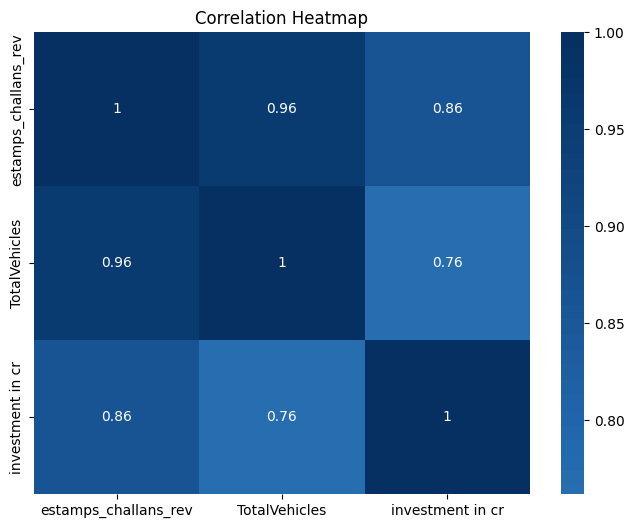

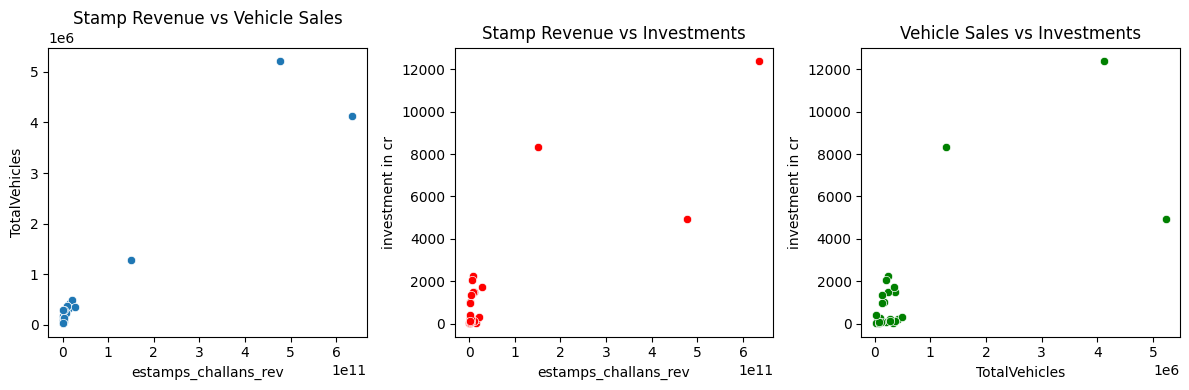

In [44]:
# Filter data for FY 2021 and 2022
filtered_df = all_merged_df[(all_merged_df['fiscal_year'] >= 2021) & (all_merged_df['fiscal_year'] <= 2022)]

# Group data by district name and calculate aggregated measures
grouped_df = filtered_df.groupby('district').agg({
    'estamps_challans_rev': 'sum',
    'TotalVehicles': 'sum',
    'investment in cr': 'sum'
}).reset_index()

# Calculate correlation matrix
correlation_matrix = grouped_df[['estamps_challans_rev', 'TotalVehicles', 'investment in cr']].corr()

# Create a heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='RdBu',annot=True, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(data=grouped_df, x='estamps_challans_rev', y='TotalVehicles')
plt.title('Stamp Revenue vs Vehicle Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(data=grouped_df, x='estamps_challans_rev', y='investment in cr', color = 'red')
plt.title('Stamp Revenue vs Investments')

plt.subplot(1, 3, 3)
sns.scatterplot(data=grouped_df, x='TotalVehicles', y='investment in cr', color = 'green')
plt.title('Vehicle Sales vs Investments')

plt.tight_layout()
plt.show()


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\3223845788.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['investment'] = filtered_df['investment in cr']*10000000


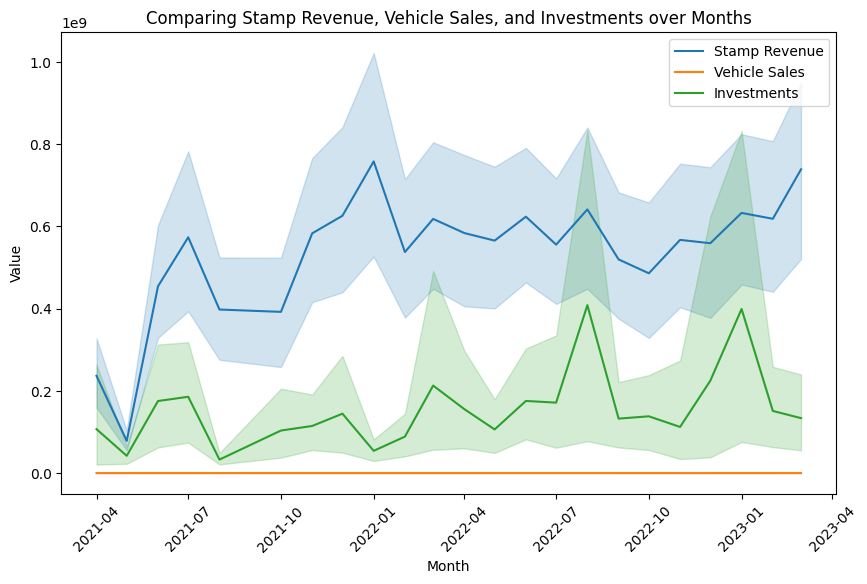

In [47]:
plt.figure(figsize=(10, 6))
filtered_df = all_merged_df[(all_merged_df['fiscal_year'] >= 2021) & (all_merged_df['fiscal_year'] <= 2022)]


filtered_df['investment'] = filtered_df['investment in cr']*10000000

# Line plot for Stamp Revenue over months
sns.lineplot(data=filtered_df, x='month', y='estamps_challans_rev', label='Stamp Revenue')

# Line plot for Vehicle Sales over months
sns.lineplot(data=filtered_df, x='month', y='TotalVehicles', label='Vehicle Sales')

# Line plot for Investments over months
sns.lineplot(data=filtered_df, x='month', y='investment', label='Investments')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Comparing Stamp Revenue, Vehicle Sales, and Investments over Months')
plt.xticks(rotation=45)

# Display legend
plt.legend()

# Display the plot
plt.show()


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\3651036846.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['investment'] = filtered_df['investment in cr'] * 10000000


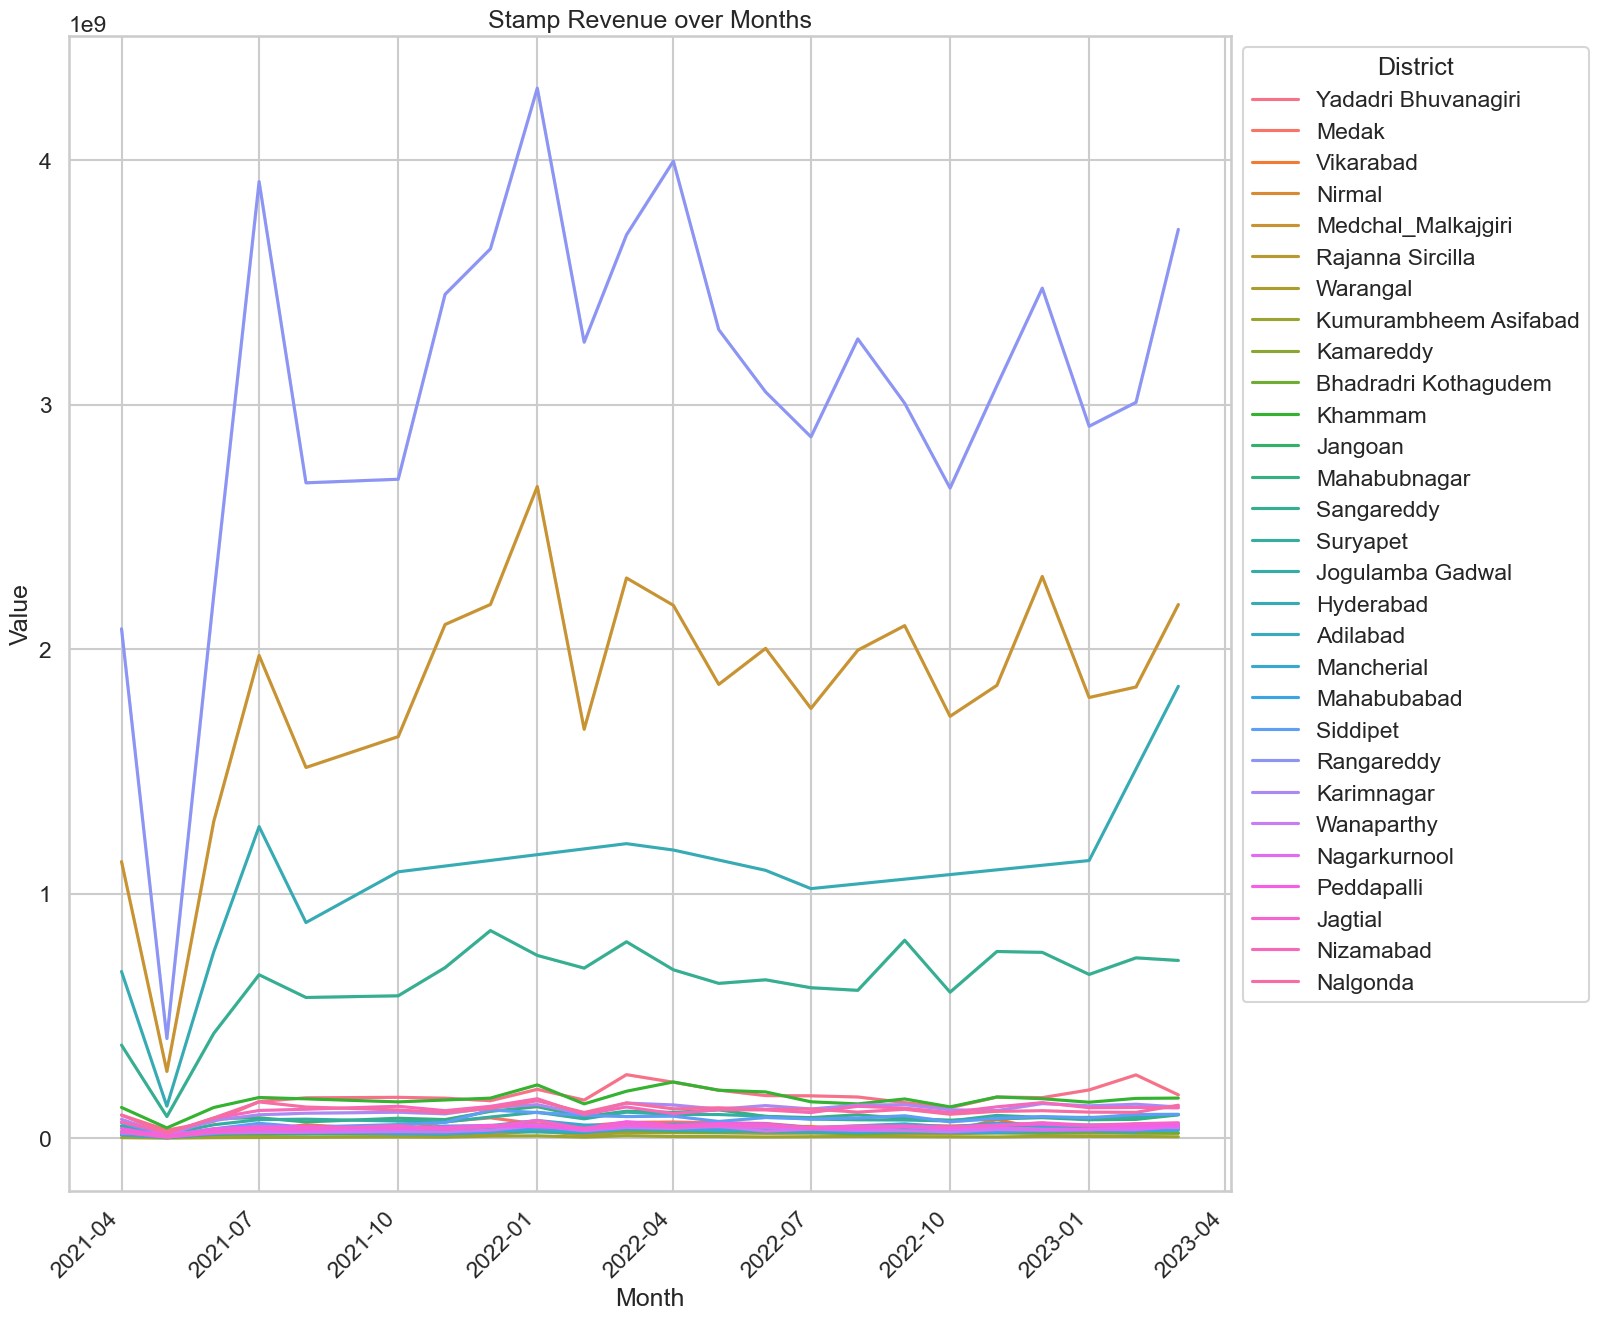

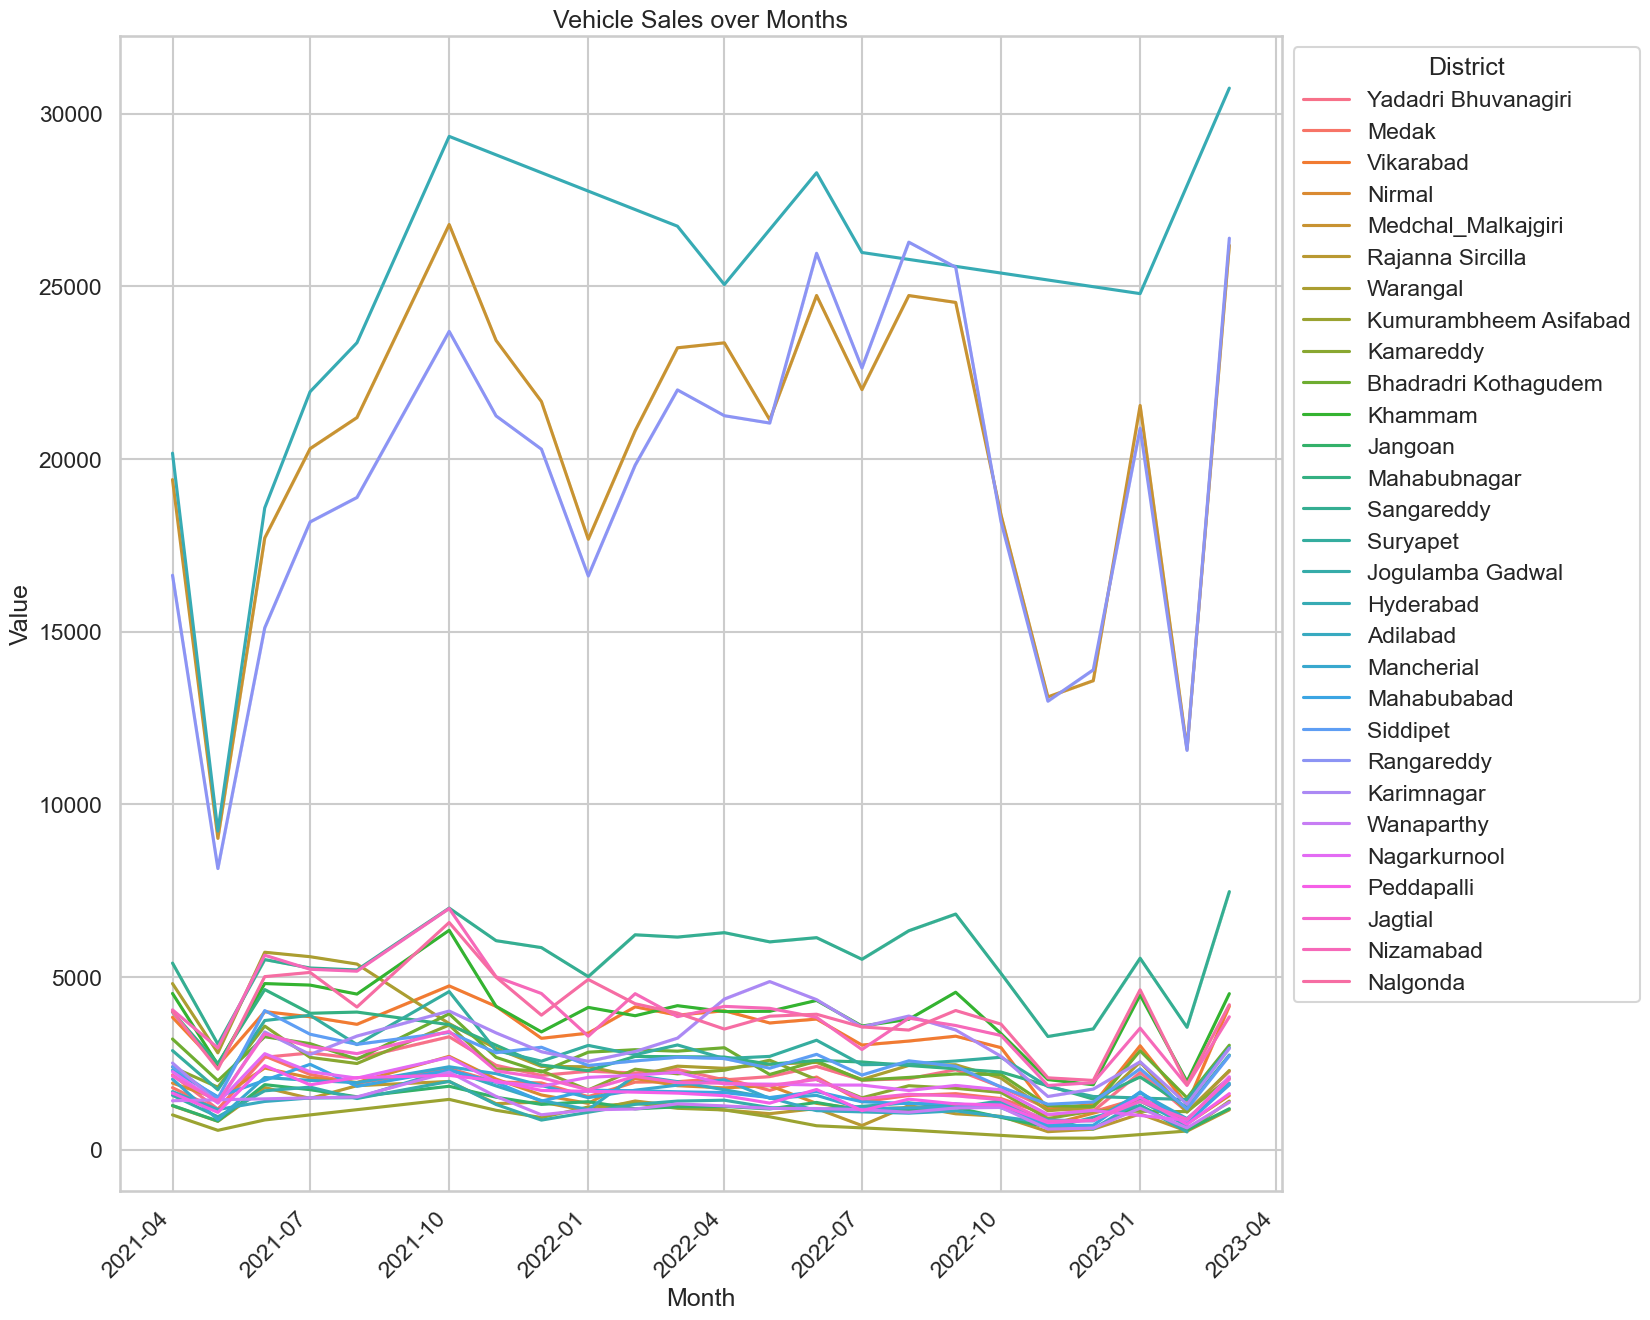

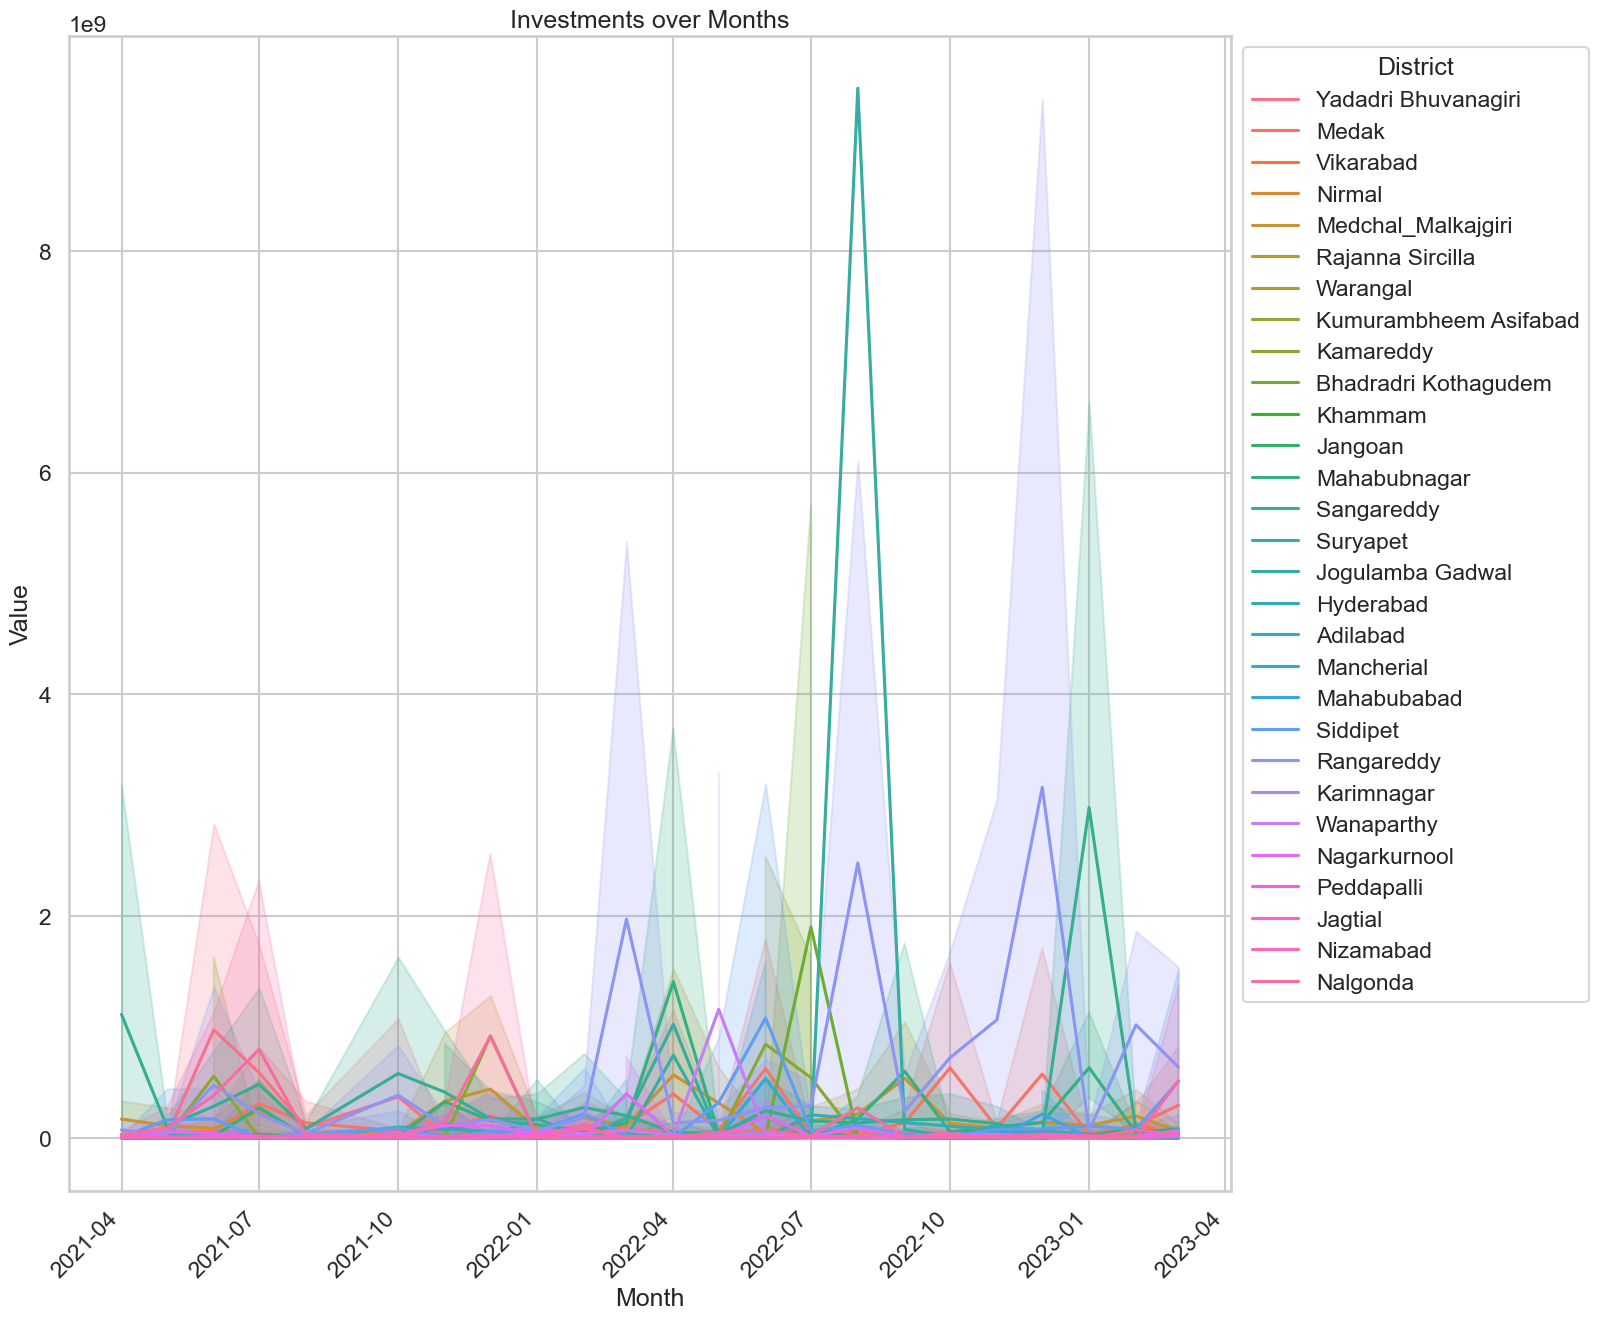

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')

plt.figure(figsize=(15, 15))


filtered_df['investment'] = filtered_df['investment in cr'] * 10000000

# Create a separate line plot for each district

# Line plot for Stamp Revenue over months
sns.lineplot(data=filtered_df, x='month', y='estamps_challans_rev', hue='district', legend='full')
plt.title('Stamp Revenue over Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45, ha ='right')
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location and position

# Display the plot
plt.show()
sns.set(style='whitegrid', context='talk')

plt.figure(figsize=(15, 15))

# Line plot for Vehicle Sales over months
sns.lineplot(data=filtered_df, x='month', y='TotalVehicles', hue='district', legend='full')
plt.title('Vehicle Sales over Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45,ha ='right')
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location and position

# Display the plot
plt.show()


sns.set(style='whitegrid', context='talk')
plt.figure(figsize=(15, 15))

# Line plot for Investments over months
sns.lineplot(data=filtered_df, x='month', y='investment', hue='district', legend='full')
plt.title('Investments over Months')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45,ha ='right')
plt.legend(title='District', loc='upper left', bbox_to_anchor=(1, 1))  # Adjust legend location and position

# Display the plot
plt.show()


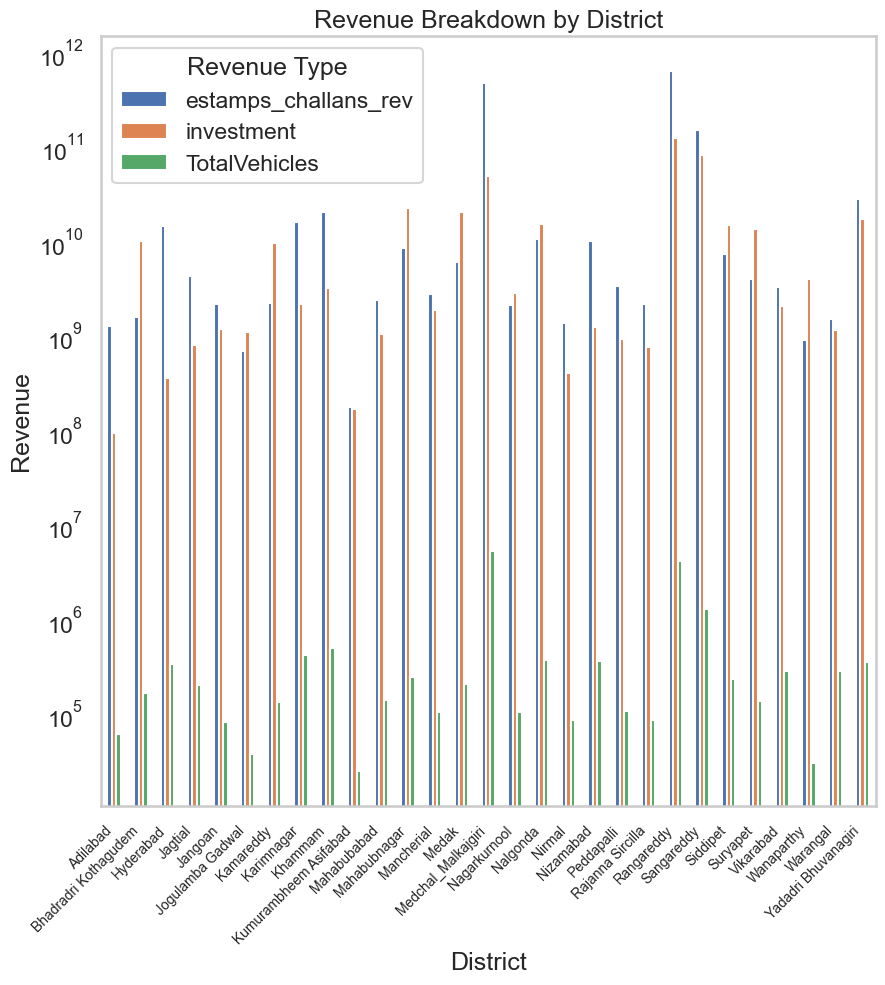

In [58]:
filtered_df2 = filtered_df[['district', 'estamps_challans_rev', 'investment', 'TotalVehicles']]
grouped_df = filtered_df2.groupby('district').sum()

# Plotting
ax = grouped_df.plot(kind='bar', figsize=(10, 10))
plt.title('Revenue Breakdown by District')
plt.xlabel('District')
plt.ylabel('Revenue')
plt.legend(title='Revenue Type')
plt.yscale('log')  # Set y-axis to logarithmic scale

plt.xticks(rotation=45, ha='right', fontsize =10)
ax.grid(False)

plt.show()

## Question 11

In [ ]:
merged_tsipass_df.head()

dist_code      month                              sector  investment in cr  \
0      14_1 2019-04-01                         Engineering            2.3200   
1      19_1 2019-04-01                         Engineering            0.6250   
2      20_3 2019-04-01                    Wood and Leather            0.2000   
3      20_3 2019-04-01                            Textiles            0.2675   
4      21_5 2019-04-01  Electrical and Electronic Products            0.1200   

   number_of_employees  fiscal_year          district  investment  
0                   15         2019      Mahabubnagar  23200000.0  
1                   13         2019          Adilabad   6250000.0  
2                    8         2019  Rajanna Sircilla   2000000.0  
3                   27         2019  Rajanna Sircilla   2675000.0  
4                    5         2019       Mahabubabad   1200000.0

In [64]:
# Filter data for FY 2021 and 2022
filtered_tsipass_df = merged_tsipass_df[(merged_tsipass_df['fiscal_year'] >= 2021) & (merged_tsipass_df['fiscal_year'] <= 2022)]

# Group data by sector and district, calculate sum of investments
grouped_tsipass_df = filtered_tsipass_df.groupby(['sector', 'district'])['investment'].sum().reset_index()

# Pivot the data to have sectors as columns and districts as rows
pivot_df = grouped_tsipass_df.pivot_table(index='district', columns='sector', values='investment', fill_value=0)



In [65]:
(pivot_df > threshold).sum().mean()

20.105263157894736

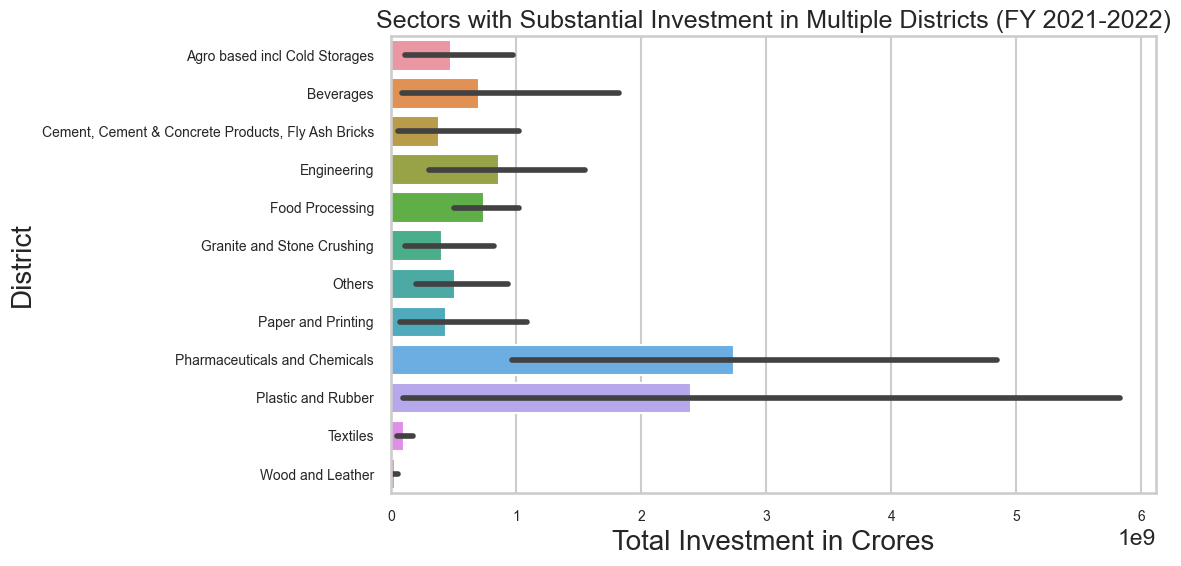

In [66]:
# Find sectors with substantial investment in multiple districts
substantial_sectors = pivot_df.columns[(pivot_df > threshold).sum() >= 20]

# Filter the pivot table for substantial sectors
substantial_pivot_df = pivot_df[substantial_sectors]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=substantial_pivot_df, orient='h')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Total Investment in Crores', fontsize=20)
plt.ylabel('District', fontsize=20)
plt.title('Sectors with Substantial Investment in Multiple Districts (FY 2021-2022)')
plt.tight_layout()
plt.show()

## Question 12

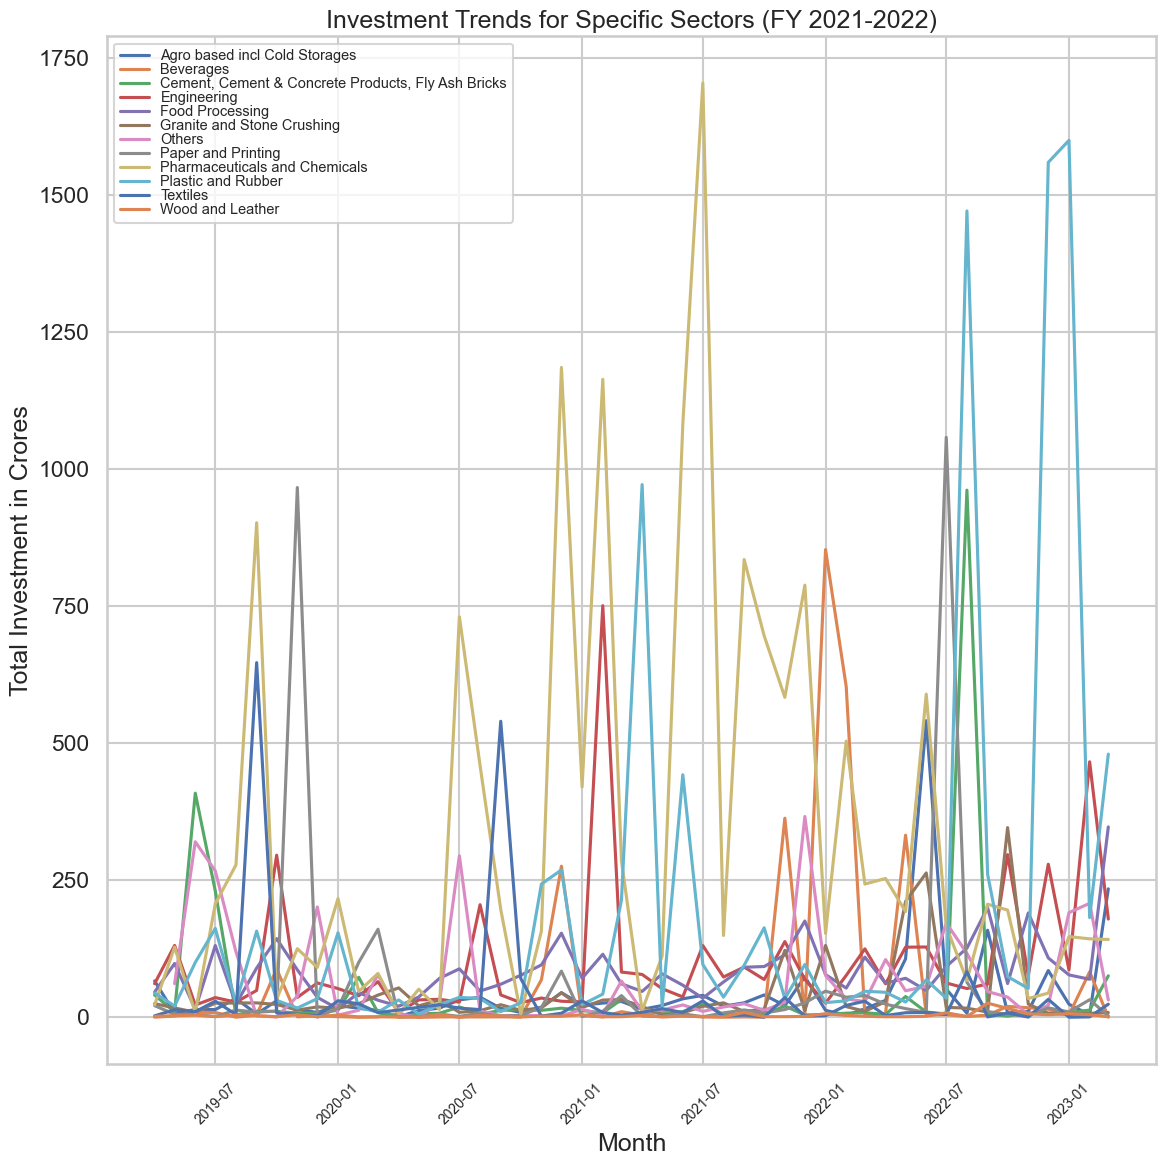

In [67]:
substantial_sectors = substantial_pivot_df.columns
filtered_investment_df = merged_tsipass_df[merged_tsipass_df['sector'].isin(substantial_sectors)]

grouped_investment_df = filtered_investment_df.groupby(['sector', 'month'])['investment in cr'].sum().reset_index()

# Create a line plot for each sector
plt.figure(figsize=(12, 12))


for sector in grouped_investment_df['sector'].unique():
    sector_data = grouped_investment_df[grouped_investment_df['sector'] == sector]
    sns.lineplot(data=sector_data, x='month', y='investment in cr', label=sector)

plt.xlabel('Month')
plt.ylabel('Total Investment in Crores')
plt.title('Investment Trends for Specific Sectors (FY 2021-2022)')
plt.xticks(rotation=45,fontsize =10)
plt.legend(loc='upper left',labelspacing=0., fontsize='xx-small')  # Adjust legend location and position
plt.tight_layout()
plt.show()

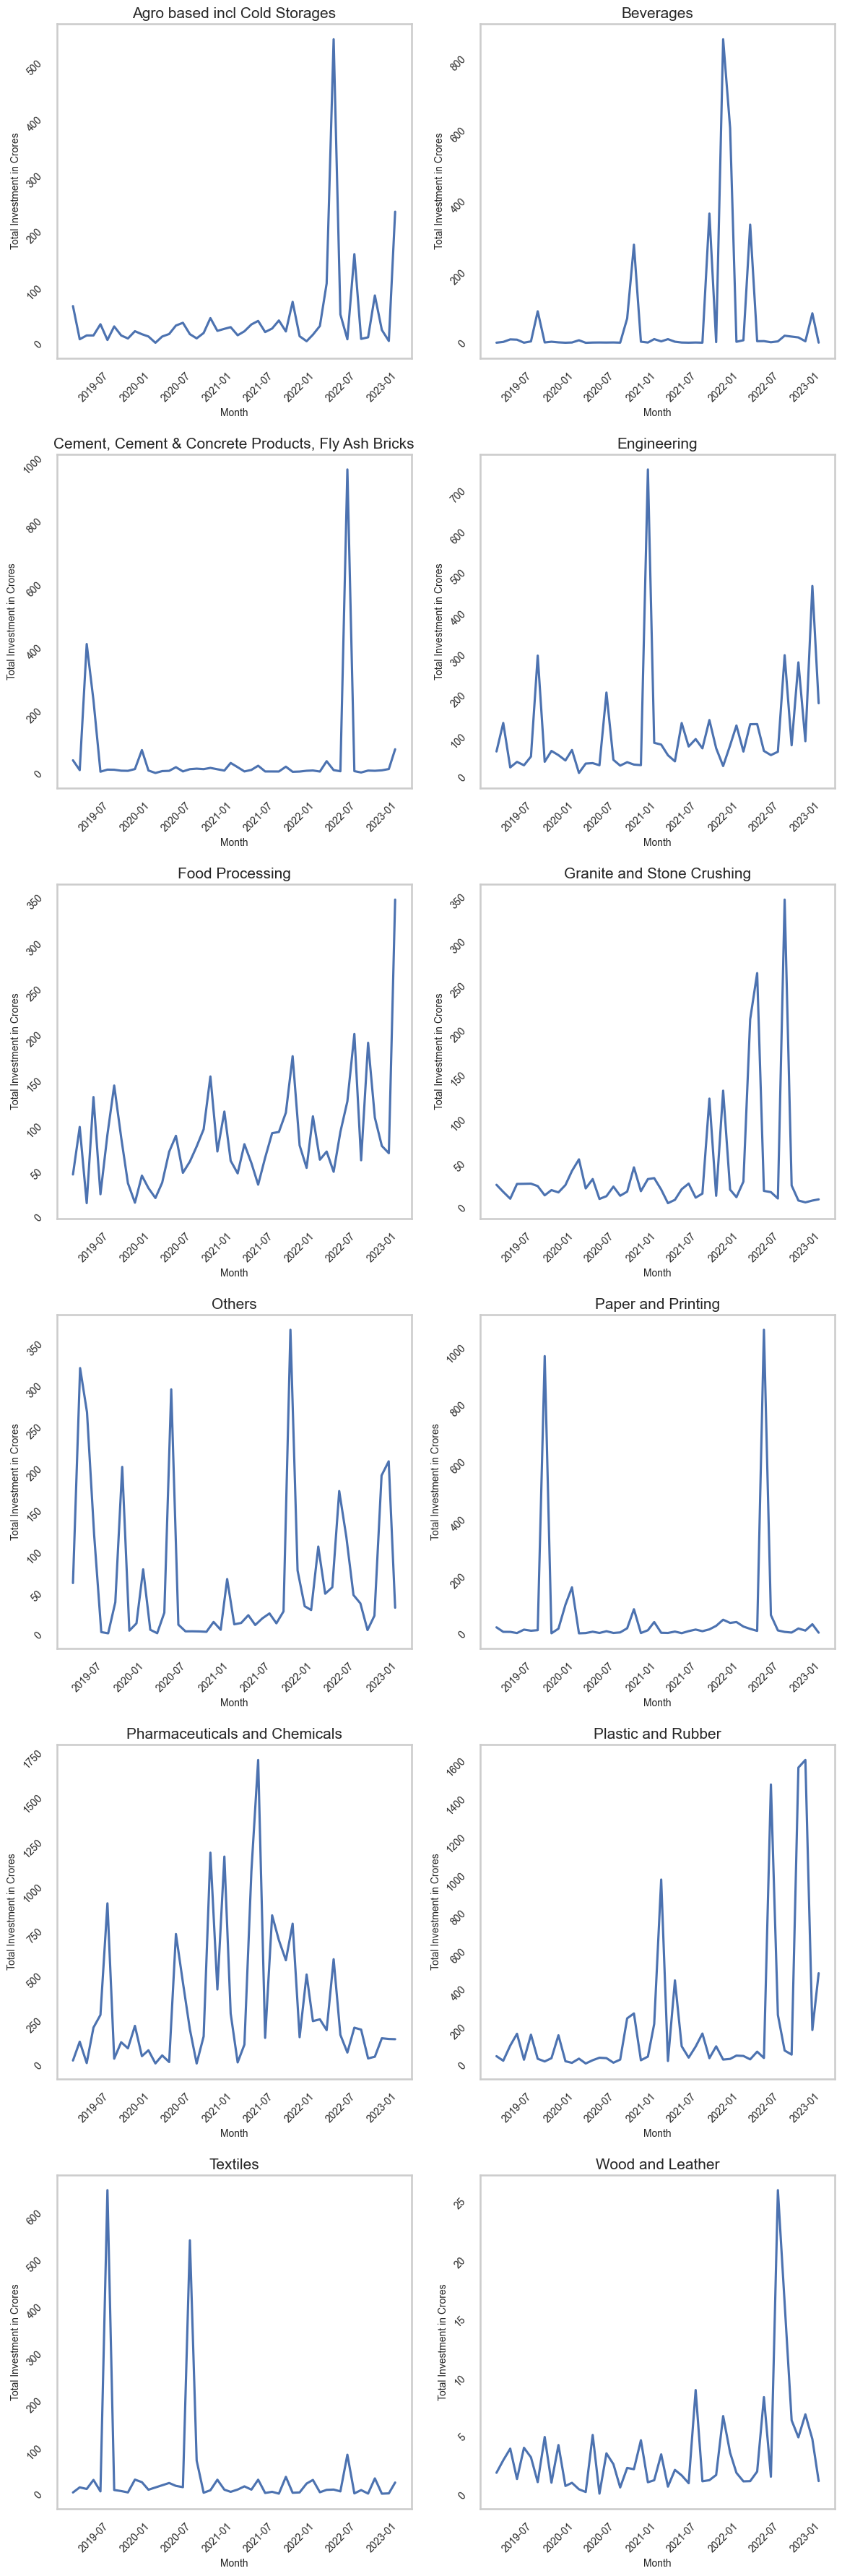

In [68]:
unique_sectors = grouped_investment_df['sector'].unique()

# Calculate the number of rows and columns for subplots
num_rows = (len(unique_sectors) + 1) // 2  # Adjust as needed
num_cols = 2  # You can change this to display more columns per row if desired

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate through each sector and create a subplot
for idx, sector in enumerate(unique_sectors):
    ax = axes[idx]
    
    sector_data = grouped_investment_df[grouped_investment_df['sector'] == sector]
    sns.lineplot(data=sector_data, x='month', y='investment in cr', ax=ax)
    
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('Total Investment in Crores', fontsize=10)
    ax.set_title(sector, fontsize=15)
    ax.tick_params(axis='both', rotation=45, labelsize=10)
    ax.grid()
    
# Adjust layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


In [86]:
import geopandas as gpd
import folium
from collections import defaultdict
import random
from jinja2 import Template  # Import the Jinja2 Template class


# Load GeoJSON data using GeoPandas
json_file_path = 'telangana_district_map.json'
gdf = gpd.read_file(json_file_path)


# Create a defaultdict to store the highest investment amount for each district's sector
district_sector_investment = defaultdict(lambda: defaultdict(int))
for district, sector, investment in zip(merged_tsipass_df['district'], merged_tsipass_df['sector'], merged_tsipass_df['investment']):
    district_sector_investment[district][sector] = max(district_sector_investment[district][sector], investment)


sectors = list(set(merged_tsipass_df['sector']))
color_palette = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'yellow', 'brown', 'gray', 'cyan', 'magenta', 'lime', 'indigo', 'teal', 'violet', 'olive', 'navy', 'maroon', 'silver', 'aqua']

# Create a dictionary to map sectors to colors
sector_colors = dict(zip(sectors, color_palette))

def style_function(feature):
    district = feature['properties']['New_Distri']
    sector = max(district_sector_investment[district], key=district_sector_investment[district].get)
    color = sector_colors[sector]
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 1.5,
        'dashArray': '5, 5',
        'fillOpacity': 0.6
    }

# Set the CRS for the GeoDataFrame
gdf.crs = 'EPSG:4326'

# Create a Folium map centered around the data
center_lat = gdf.geometry.centroid.y.mean()
center_lon = gdf.geometry.centroid.x.mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=10,tiles=None)

# Add GeoJSON data with style and tooltip
folium.GeoJson(gdf, style_function=style_function, tooltip=folium.GeoJsonTooltip(fields=['New_Distri'], aliases=['District'])).add_to(m)
legend_html_template = """
<div style="position: fixed; bottom: 20px; left: 20px; z-index: 1000; border: 1px solid black;">
  <h4 style="font-size: 12px; margin: 0; padding: 3px;">Legend</h4>
  <ul style="list-style-type: none; padding-left: 0; margin: 0;">
    {% for sector, color in sector_colors.items() %}
      <li style="font-size: 10px; margin-bottom: 2px; padding-left: 3px;"><span style="color: {{ color }};">&#9632;</span> {{ sector }}</li>
    {% endfor %}
  </ul>
</div>
"""
legend_html = Template(legend_html_template).render(sector_colors=sector_colors)  # Render the template with Jinja2

m.get_root().html.add_child(folium.Element(legend_html))  # Add the rendered HTML to the map


# Add district labels
for index, row in gdf.iterrows():
    district_name = row['New_Distri']
    district_center = [row.geometry.centroid.y, row.geometry.centroid.x]
    
    # Create a custom icon to display district name as text
    icon = folium.DivIcon(html=f'<div style="font-size: 10px;">{district_name}</div>')
    folium.Marker(location=district_center, icon=icon).add_to(m)

# Save the map as an HTML file
output_map_path = 'output_map3.html'
m.save(output_map_path)

# Display the map (if using a Jupyter Notebook)
display(m)


C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\608362967.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lat = gdf.geometry.centroid.y.mean()
C:\Users\Sucheta Jhunjhunwala\AppData\Local\Temp\ipykernel_12136\608362967.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center_lon = gdf.geometry.centroid.x.mean()
